# Imports

In [633]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import operator
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.ensemble import HistGradientBoostingRegressor


# Visualizar Dataset

In [634]:
dataset = pd.read_csv('DataSet\StudentPerformanceFactors.csv')
dataset = dataset.dropna()
dataset = dataset.replace({'Yes': 1, 'No': 0})
dataset.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Santiago\AppData\Local\Temp\ipykernel_2764\3774538805.py:1: SyntaxWarning: invalid escape sequence '\S'
  dataset = pd.read_csv('DataSet\StudentPerformanceFactors.csv')
C:\Users\Santiago\AppData\Local\Temp\ipykernel_2764\3774538805.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'Yes': 1, 'No': 0})


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,Low,1,0,Low,Medium,Public,Positive,3,0,High School,Near,Male,67
1,19,64,Low,Medium,0,8,59,Low,1,2,Medium,Medium,Public,Negative,4,0,College,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,Medium,1,2,Medium,Medium,Public,Neutral,4,0,Postgraduate,Near,Male,74
3,29,89,Low,Medium,1,8,98,Medium,1,1,Medium,Medium,Public,Negative,4,0,High School,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,Medium,1,3,Medium,High,Public,Neutral,4,0,College,Near,Female,70


## Columnas iniciales

In [635]:
print("Columnas: ", dataset.columns)
print("Tamaño del dataset: ", dataset.shape)

Columnas:  Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')
Tamaño del dataset:  (6378, 20)


## Grafico con distribuciones

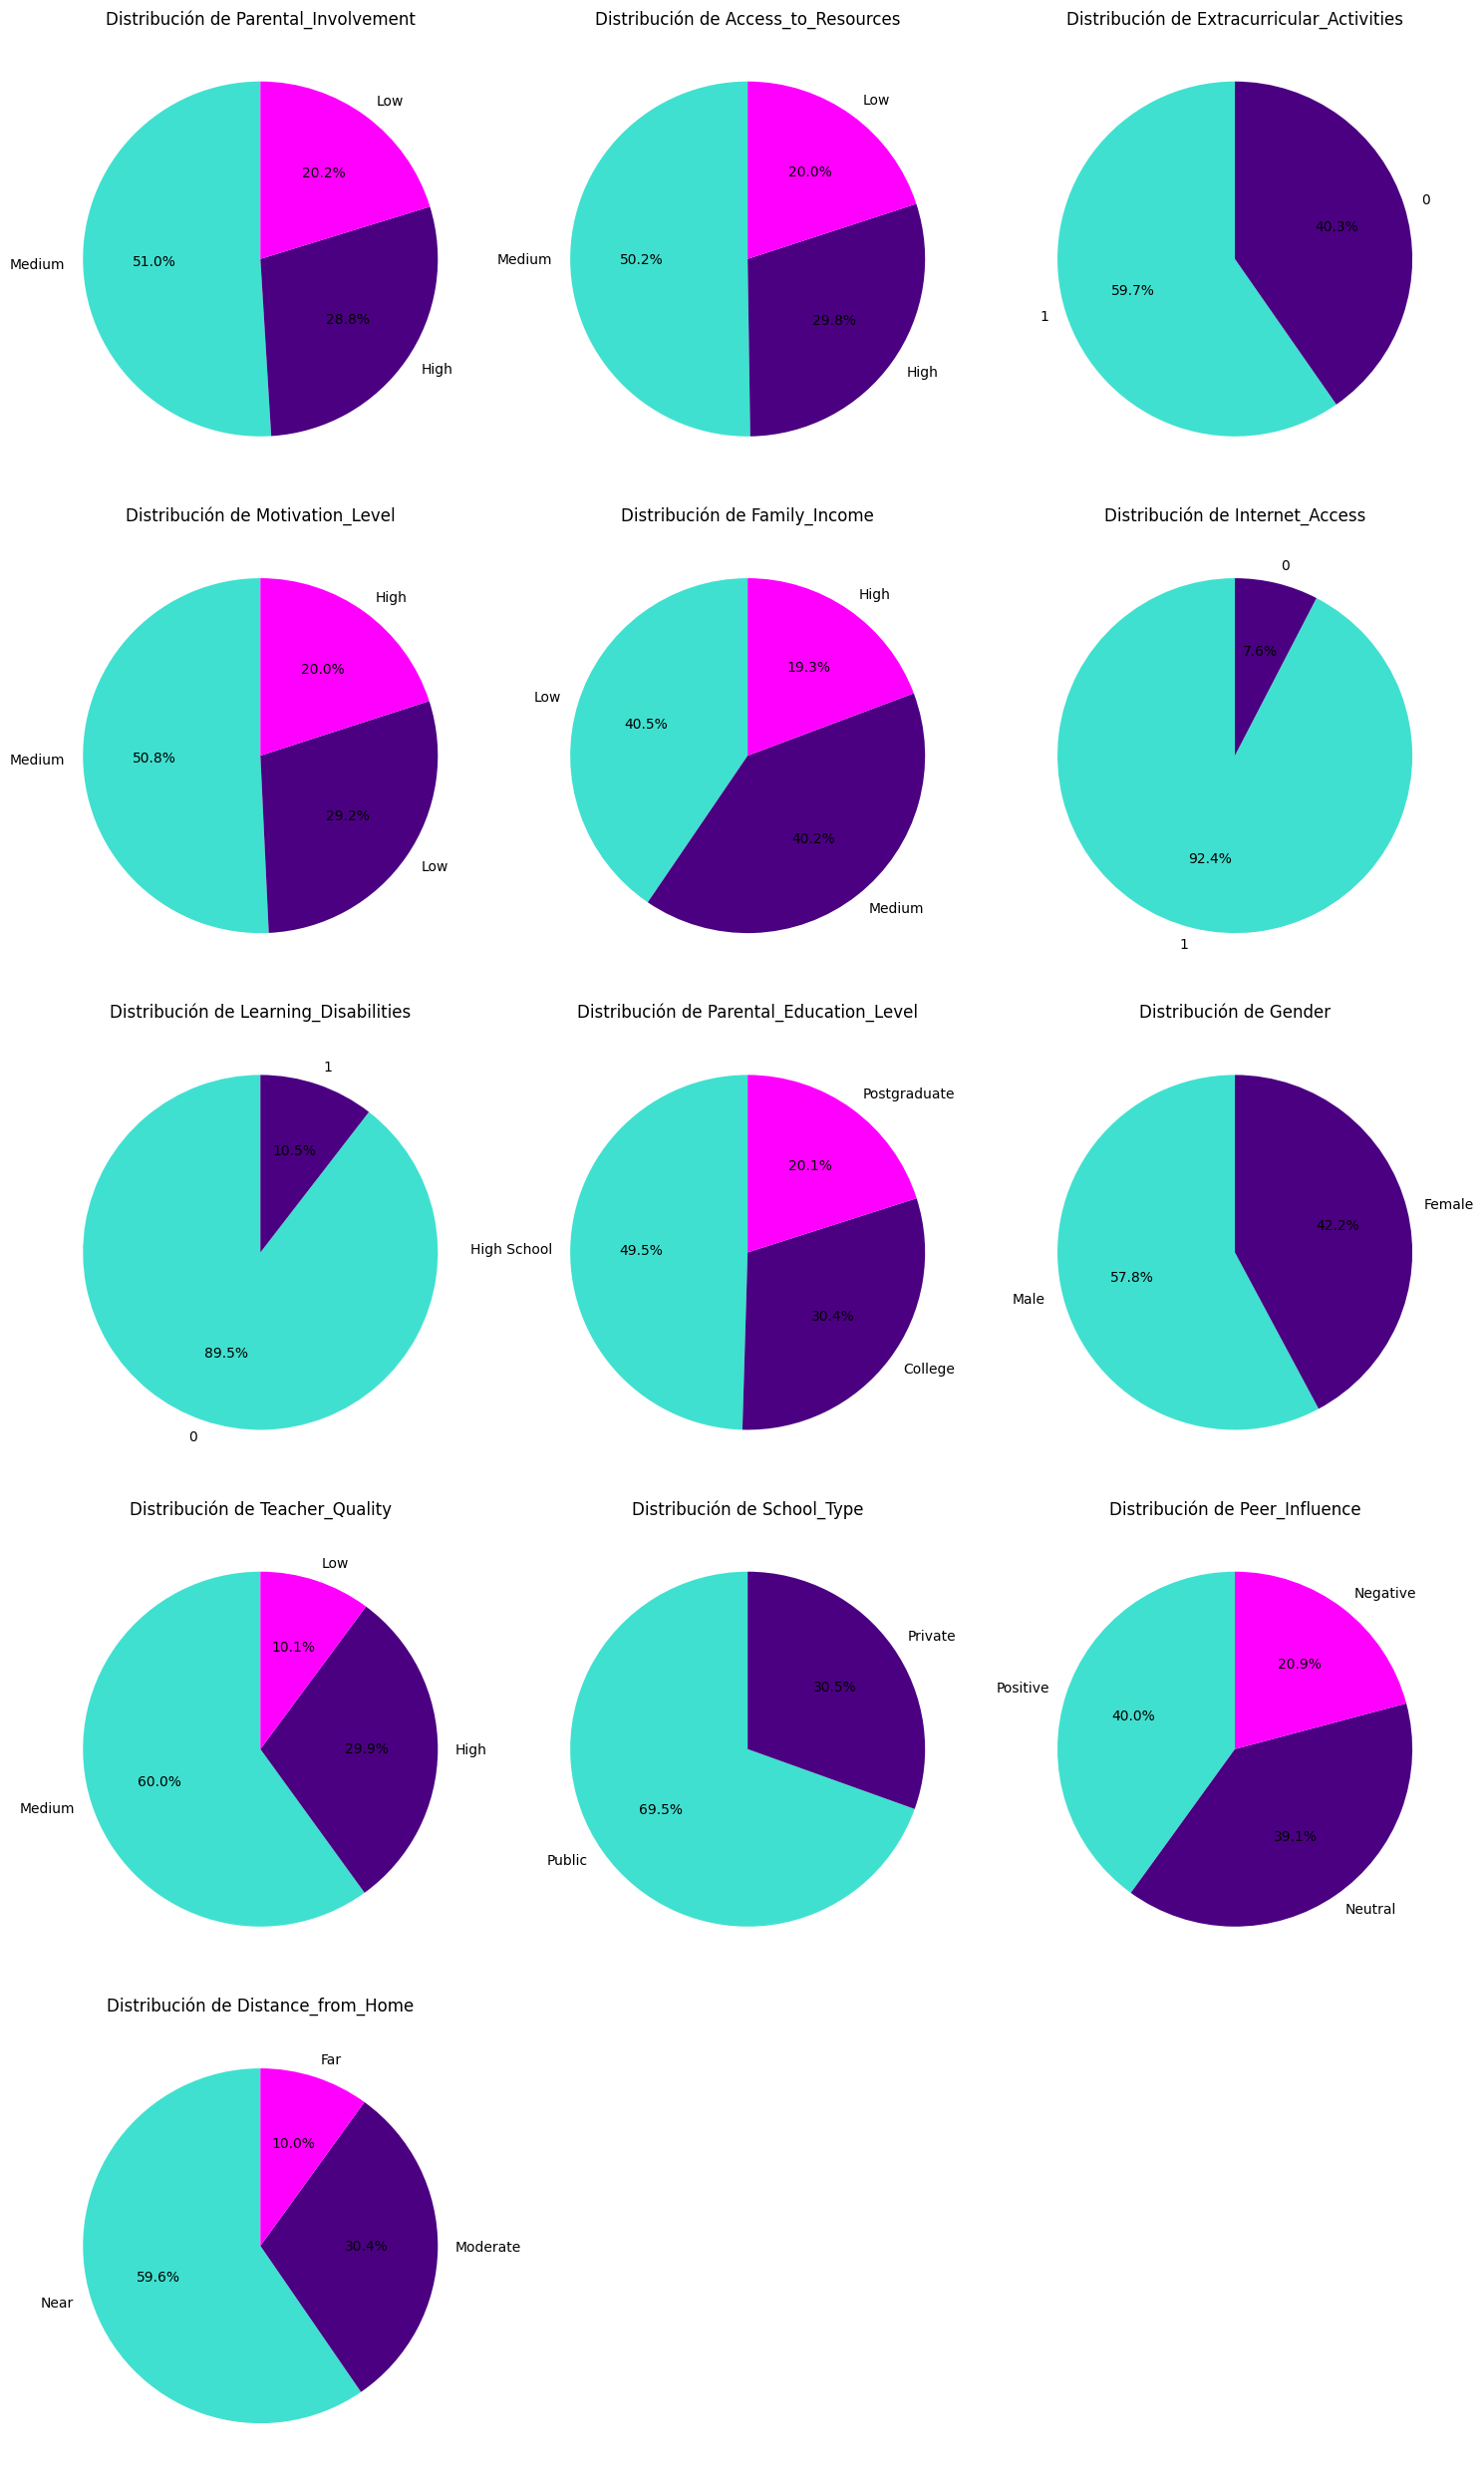

In [636]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns_with_three_values = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities' ,'Motivation_Level', 'Family_Income', 'Internet_Access',	'Learning_Disabilities','Parental_Education_Level','Gender',
    'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Distance_from_Home'
]

n_cols = 3
n_rows = (len(categorical_columns_with_three_values) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

axes = axes.flatten()

for i, col in enumerate(categorical_columns_with_three_values):
    
    value_counts = dataset[col].value_counts()

    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['#40E0D0', '#4B0082', 'magenta'])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].axis('equal')  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Grafico de Histogramas

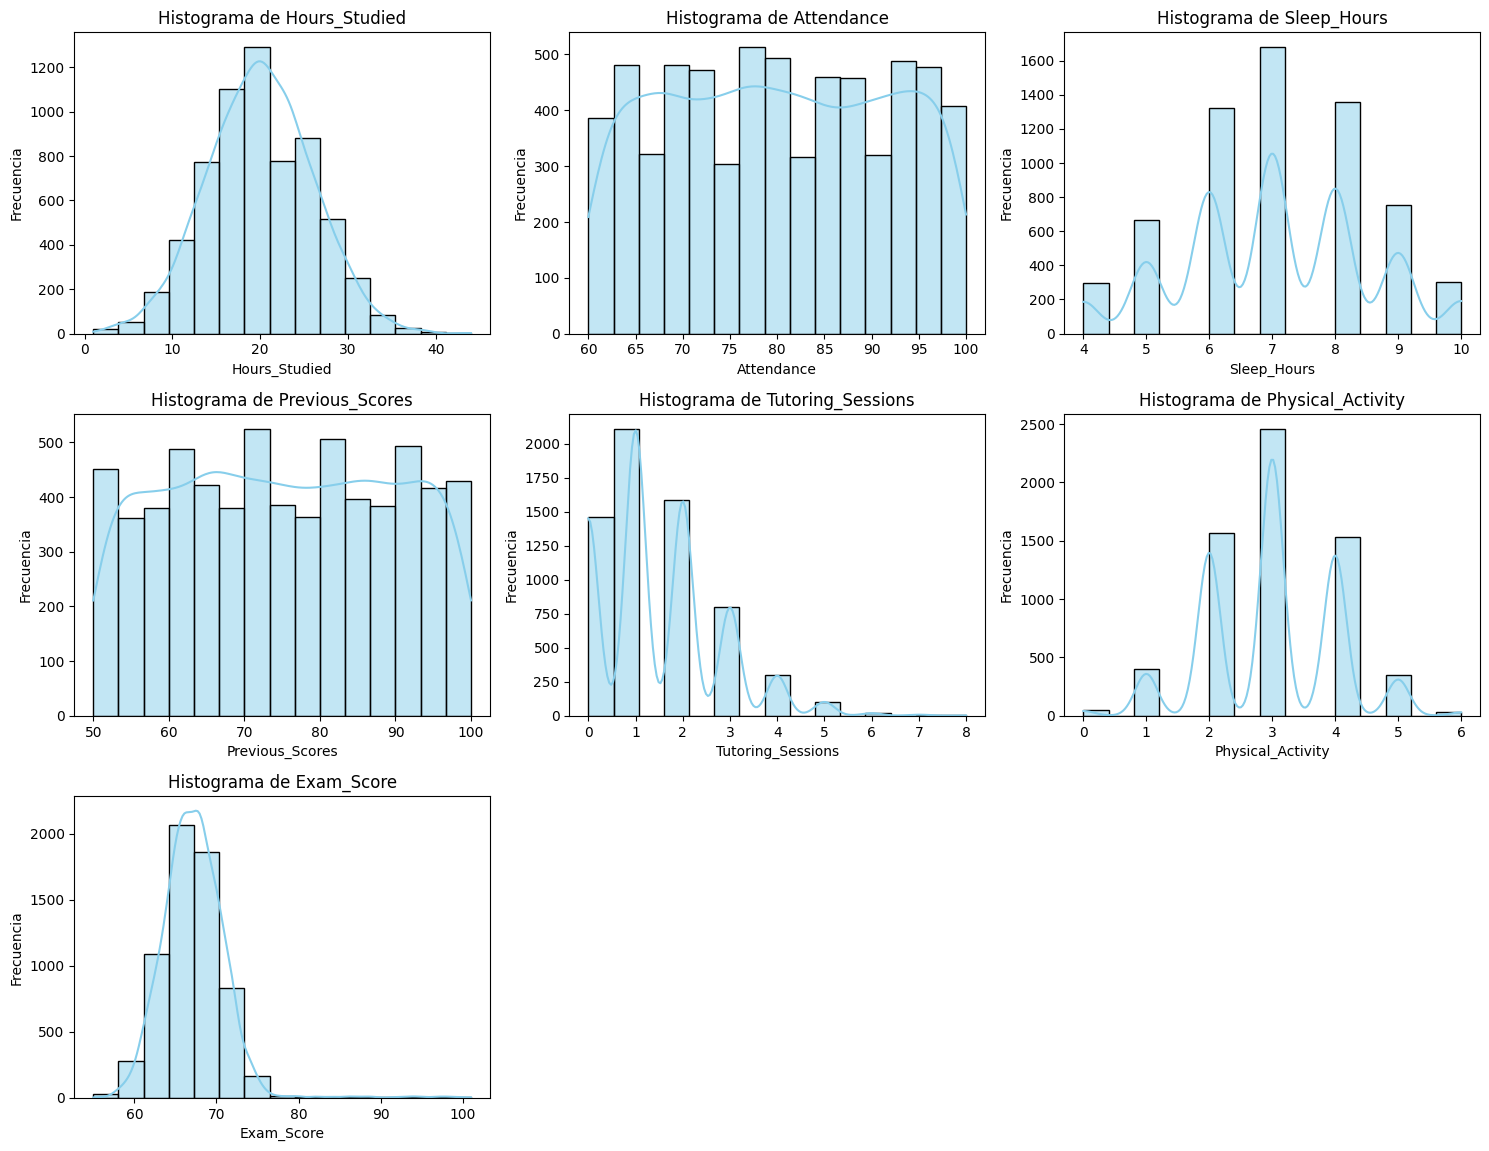

In [637]:
continous_columns = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
    'Tutoring_Sessions', 'Physical_Activity', 
    'Exam_Score'
]

plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_columns, 1):
    plt.subplot(4, 3, i)  
    sns.histplot(dataset[column], kde=True, bins=15, color='skyblue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Creacion de dummies

In [638]:
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'School_Type', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
dataset = pd.get_dummies(dataset, columns=categorical_columns)
dataset = dataset.replace({True: 1, False: 0})
print(dataset.columns)
dataset.head()

Index(['Hours_Studied', 'Attendance', 'Extracurricular_Activities',
       'Sleep_Hours', 'Previous_Scores', 'Internet_Access',
       'Tutoring_Sessions', 'Physical_Activity', 'Learning_Disabilities',
       'Exam_Score', 'Parental_Involvement_High', 'Parental_Involvement_Low',
       'Parental_Involvement_Medium', 'Access_to_Resources_High',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Motivation_Level_High', 'Motivation_Level_Low',
       'Motivation_Level_Medium', 'Family_Income_High', 'Family_Income_Low',
       'Family_Income_Medium', 'Teacher_Quality_High', 'Teacher_Quality_Low',
       'Teacher_Quality_Medium', 'Peer_Influence_Negative',
       'Peer_Influence_Neutral', 'Peer_Influence_Positive',
       'School_Type_Private', 'School_Type_Public',
       'Parental_Education_Level_College',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Far',
       'Distance_from_Home_Moderate', 'Dist

C:\Users\Santiago\AppData\Local\Temp\ipykernel_2764\3730533894.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({True: 1, False: 0})


,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,Physical_Activity,Learning_Disabilities,Exam_Score,...,School_Type_Private,School_Type_Public,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,0,7,73,1,0,3,0,67,...,0,1,0,1,0,0,0,1,0,1
1,19,64,0,8,59,1,2,4,0,61,...,0,1,1,0,0,0,1,0,1,0
2,24,98,1,7,91,1,2,4,0,74,...,0,1,0,0,1,0,0,1,0,1
3,29,89,1,8,98,1,1,4,0,71,...,0,1,0,1,0,0,1,0,0,1
4,19,92,1,6,65,1,3,4,0,70,...,0,1,1,0,0,0,0,1,1,0


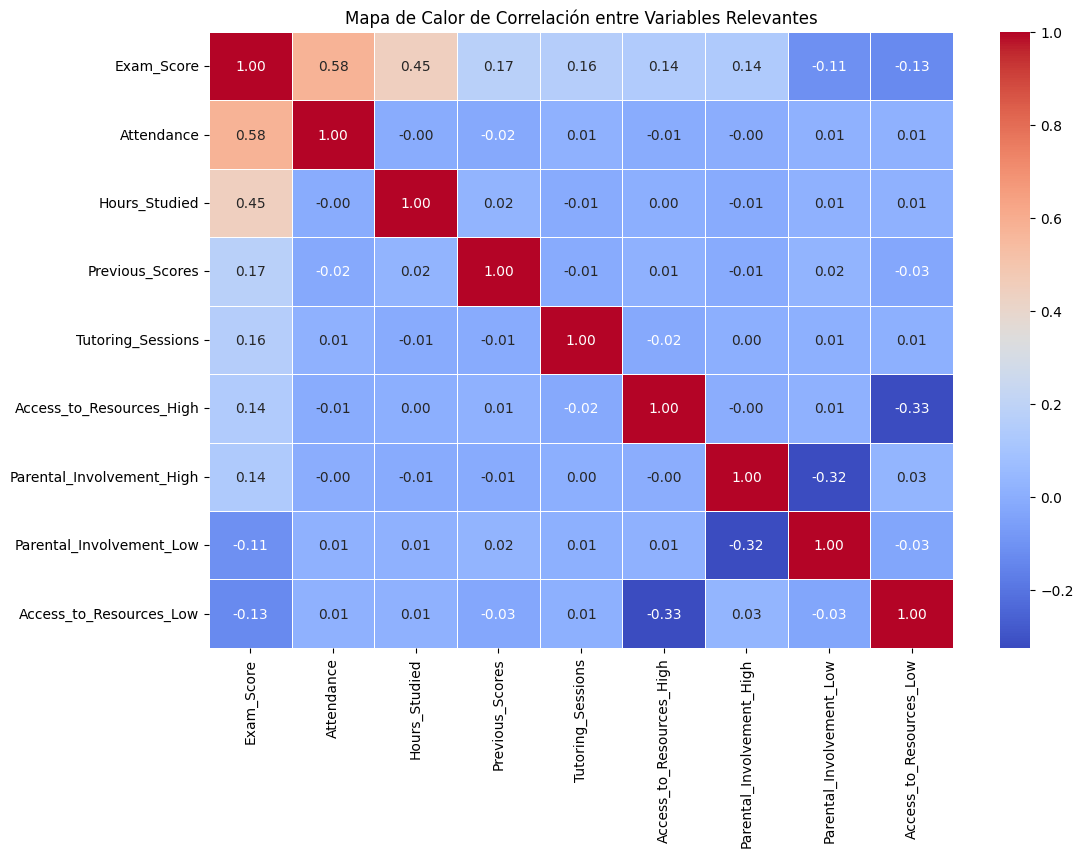

In [639]:
correlation_matrix = dataset.corr()

correlation_target = correlation_matrix['Exam_Score'].sort_values(ascending=False)
relevant_columns = correlation_target[abs(correlation_target) > 0.1].index 

plt.figure(figsize=(12, 8))
sns.heatmap(dataset[relevant_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mapa de Calor de Correlación entre Variables Relevantes")
plt.show()

In [640]:
X = dataset.drop('Exam_Score', axis=1).astype(float)
y = dataset['Exam_Score'].astype(float)

# Regresion Lineal

## Regresion Lineal Aleatoria

In [641]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regresionLinealMeanCV = sm.OLS(y_train, x_train).fit()
predictions = regresionLinealMeanCV.predict(x_test)
regresionLinealMeanCVMSE = mean_squared_error(y_test, predictions)
regresionLinealMeanCVR2 = r2_score(y_test, predictions)
print('MSE:', regresionLinealMeanCVMSE)
print('R2:', regresionLinealMeanCVR2)
print(regresionLinealMeanCV.summary())

MSE: 4.655594959860364
R2: 0.6960540673247476
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     502.1
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:01:38   Log-Likelihood:                -10883.
No. Observations:                5102   AIC:                         2.182e+04
Df Residuals:                    5074   BIC:                         2.201e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

## Regresion Lineal Con Mejor Fold

### Cross Validation

In [642]:
CrossValidationMSE = -cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=5)
print('MSE Cross Validation:', CrossValidationMSE)
print('Mean MSE:', np.mean(CrossValidationMSE))
print('Mejor MSE:', np.min(CrossValidationMSE))

CrossValidationR2 = cross_val_score(LinearRegression(), X, y, scoring='r2', cv=5)
print('R2 Cross Validation:', CrossValidationR2)
print('Mean R2:', np.mean(CrossValidationR2))
print('Mejor R2:', np.max(CrossValidationR2))

MSE Cross Validation: [6.07577325 4.38248771 4.52554264 4.17426202 2.3802017 ]
Mean MSE: 4.307653464031304
Mejor MSE: 2.3802016981485394
R2 Cross Validation: [0.62034829 0.71760673 0.70066938 0.72588226 0.83767939]
Mean R2: 0.7204372085087707
Mejor R2: 0.8376793850847896


In [643]:
x_train = X[:int(0.8*len(X))]
x_test = X[int(0.8*len(X)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]

regresionLinealBestCV = sm.OLS(y_train, x_train).fit()
predictions = regresionLinealBestCV.predict(x_test)
regresionLinealBestCVMSE = mean_squared_error(y_test, predictions)
regresionLinealBestCVR2 = r2_score(y_test, predictions)

coeficientes_regresion_lineal = regresionLinealBestCV.params

print('MSE:', regresionLinealBestCVMSE)
print('R2:', regresionLinealBestCVR2)
print(regresionLinealBestCV.summary())

MSE: 2.3783535887854854
R2: 0.837707473462215
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     425.7
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:01:38   Log-Likelihood:                -11210.
No. Observations:                5102   AIC:                         2.248e+04
Df Residuals:                    5074   BIC:                         2.266e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

# Lasso

## Encontrar mejor alpha

In [644]:
def findBestAlpha(X, y, alphas):
    mse = []
    r2_scores = []
    for alpha in alphas:
        model = Lasso(alpha=alpha)
        cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
        mse_value = np.mean(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
        r2_score_value = np.mean(cross_val_score(model, X, y, scoring='r2', cv=10))
        r2_scores.append(r2_score_value)
        mse.append(mse_value)
    
    best_alpha = alphas[np.argmin(mse)]
    return best_alpha, mse, r2_scores

## Lasso con mejor alpha y el proemdio de CV

MSE: 4.3162226021105425
R2: 0.7198492313996819
El mejor alpha es: 0.01
El mejor MSE es: 4.3162226021105425
Hours_Studied: 0.29532466434183047
Attendance: 0.19857857809327925
Extracurricular_Activities: 0.5245379645454246
Sleep_Hours: -0.008865037553932427
Previous_Scores: 0.04835537345465904
Internet_Access: 0.7531669958171485
Tutoring_Sessions: 0.4772090729720091
Physical_Activity: 0.1862316966730807
Learning_Disabilities: -0.7647487517099534
Parental_Involvement_High: 0.9974926563612974
Parental_Involvement_Low: -0.9258015645737494
Parental_Involvement_Medium: 0.0
Access_to_Resources_High: 0.9707838020159058
Access_to_Resources_Low: -0.9877695117135653
Access_to_Resources_Medium: 0.0
Motivation_Level_High: 0.5459560548525261
Motivation_Level_Low: -0.4750664334009169
Motivation_Level_Medium: -0.0
Family_Income_High: 0.5660195098285488
Family_Income_Low: -0.5079680651547921
Family_Income_Medium: -0.0
Teacher_Quality_High: 0.5733421691242788
Teacher_Quality_Low: -0.3429326025646653
Teac

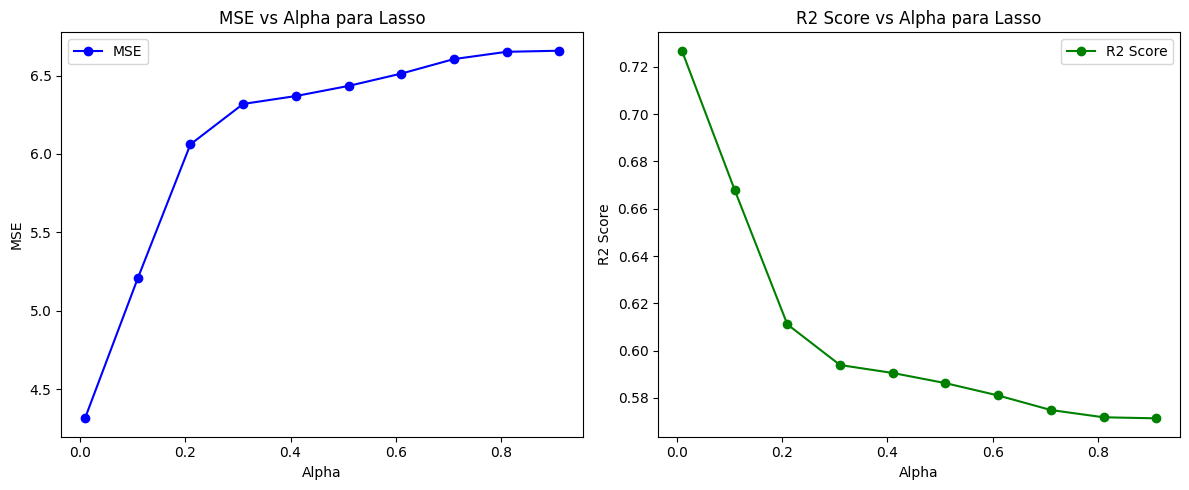

In [645]:
alphas = np.arange(0.01, 1, 0.1)

best_alpha, mse_values, bestr2_score = findBestAlpha(X, y, alphas)

lassoMeanCV = Lasso(alpha=best_alpha)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lassoMeanCVMSE = np.mean(-cross_val_score(lassoMeanCV, X, y, scoring='neg_mean_squared_error', cv=5))
lassoMeanCVR2 = np.mean(cross_val_score(lassoMeanCV, X, y, scoring='r2', cv=5))

lassoMeanCV.fit(x_train, y_train)
predictions = lassoMeanCV.predict(x_test)


lassoCoef = lassoMeanCV.coef_

print(f'MSE: {lassoMeanCVMSE}')
print(f'R2: {lassoMeanCVR2}')

print(f"El mejor alpha es: {best_alpha}")
print(f"El mejor MSE es: {min(mse_values)}")

for i in range(len(lassoCoef)):
    print(f'{X.columns[i]}: {lassoCoef[i]}')






fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
axs[0].plot(alphas, mse_values, marker='o', color='b', label='MSE')
axs[0].set_xlabel('Alpha')
axs[0].set_ylabel('MSE')
axs[0].set_title('MSE vs Alpha para Lasso')
axs[0].legend()

# Segundo gráfico: R2 Score vs Alpha
axs[1].plot(alphas, bestr2_score, marker='o', color='g', label='R2 Score')
axs[1].set_xlabel('Alpha')
axs[1].set_ylabel('R2 Score')
axs[1].set_title('R2 Score vs Alpha para Lasso')
axs[1].legend()

# Ajustar diseño y mostrar la figura
plt.tight_layout()
plt.show()


## Lasso con mejor alpha y mejor cv

In [646]:

x_train = X[:int(0.8*len(X))]
x_test = X[int(0.8*len(X)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]

lassoBestCV = Lasso(alpha=0.01)

lassoBestCV.fit(x_train, y_train)
lassoBestCVMSE = mean_squared_error(y_test, lassoBestCV.predict(x_test))
lassoBestCVR2 = r2_score(y_test, lassoBestCV.predict(x_test))
predictions = lassoBestCV.predict(x_test)
print('MSE:', lassoBestCVMSE)
print('R2:', lassoBestCVR2)

coeficientes_lasso = lassoBestCV.coef_

for i in range(len(coeficientes_lasso)):
    print(f'{X.columns[i]}: {coeficientes_lasso[i]}')

MSE: 2.4177836635506753
R2: 0.8350168699769341
Hours_Studied: 0.29258899380511716
Attendance: 0.19695165142049323
Extracurricular_Activities: 0.4812201489731248
Sleep_Hours: 0.0
Previous_Scores: 0.04785615796671367
Internet_Access: 0.7221026538823683
Tutoring_Sessions: 0.4973141069306438
Physical_Activity: 0.1526971848590001
Learning_Disabilities: -0.6930136428608578
Parental_Involvement_High: 1.0144026954914032
Parental_Involvement_Low: -0.8783885311566582
Parental_Involvement_Medium: -0.0
Access_to_Resources_High: 0.9737855557246278
Access_to_Resources_Low: -1.0222904454624306
Access_to_Resources_Medium: 0.0
Motivation_Level_High: 0.47623986248609573
Motivation_Level_Low: -0.5253598845464461
Motivation_Level_Medium: -0.0
Family_Income_High: 0.49571338331639603
Family_Income_Low: -0.4599612573539613
Family_Income_Medium: 0.0
Teacher_Quality_High: 0.4497726253558435
Teacher_Quality_Low: -0.42422247413505465
Teacher_Quality_Medium: -0.0
Peer_Influence_Negative: -0.4803546680012119
Peer_

# Ridge

## Encontrar el mejor alpha

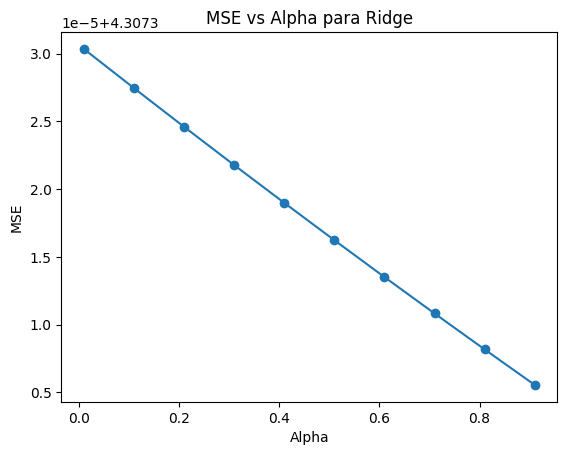

In [647]:

def best_alpha_ridge(X, y, alphas):
    mse = []
    r2_scores = []
    for alpha in alphas:
        model = Ridge(alpha=alpha)
        mse_value = np.mean(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10))
        r2_score_value = np.mean(cross_val_score(model, X, y, scoring='r2', cv=10))
        r2_scores.append(r2_score_value)
        mse.append(mse_value)
    
    best_alpha = alphas[np.argmin(mse)]
    return best_alpha, mse, r2_scores

alphas = np.arange(0.01, 1, 0.1)
best_alpha, mse_values, bestr2_score = best_alpha_ridge(X, y, alphas)

plt.plot(alphas, mse_values, marker='o')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs Alpha para Ridge')
plt.show()

## Ridge con mejor alpha y el promedio CV

In [648]:
ridgeMeanCV = Ridge(alpha=best_alpha)
x_test, x_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

ridgeMeanCVMSE = np.mean(-cross_val_score(ridgeMeanCV, X, y, scoring='neg_mean_squared_error', cv=10))
ridgeMeanCVR2 = np.mean(cross_val_score(ridgeMeanCV, X, y, scoring='r2', cv=5))

ridgeMeanCV.fit(x_train, y_train)
predictions = ridgeMeanCV.predict(x_test)
ridgeCoef = ridgeMeanCV.coef_
print(f"El mejor alpha es: {best_alpha}")
print(f'MSE: {ridgeMeanCVMSE}')
print(f"El mejor r2 es: {ridgeMeanCVR2}")

for i in range(len(ridgeCoef)):
    print(f'{X.columns[i]}: {ridgeCoef[i]}')

El mejor alpha es: 0.91
MSE: 4.307305538616999
El mejor r2 es: 0.7204390547758079
Hours_Studied: 0.2914474999651569
Attendance: 0.19878255164700023
Extracurricular_Activities: 0.5440094272224003
Sleep_Hours: 0.05309865755348518
Previous_Scores: 0.05090517497725586
Internet_Access: 0.9355554695016999
Tutoring_Sessions: 0.5596175715070112
Physical_Activity: 0.1259759043460032
Learning_Disabilities: -0.8221841865162104
Parental_Involvement_High: 1.0113743162779745
Parental_Involvement_Low: -0.8552885796745991
Parental_Involvement_Medium: -0.1560857366055861
Access_to_Resources_High: 1.0562943446149604
Access_to_Resources_Low: -1.094001237516279
Access_to_Resources_Medium: 0.03770689290038427
Motivation_Level_High: 0.39797062581209286
Motivation_Level_Low: -0.5051173331290578
Motivation_Level_Medium: 0.10714670731570114
Family_Income_High: 0.43534212165411085
Family_Income_Low: -0.38480604687762937
Family_Income_Medium: -0.050536074776725066
Teacher_Quality_High: 0.44825827901248416
Teache

## Ridge con mejor alpha y el mejor CV

In [649]:
x_train = X[:int(0.8*len(X))]
x_test = X[int(0.8*len(X)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]

ridgeBestCV = Ridge(alpha=0.1)
ridgeBestCV.fit(x_train, y_train)
predictions = ridgeBestCV.predict(x_test)
ridgeBestCVMSE = mean_squared_error(y_test, predictions)
ridgeBestCVR2 = r2_score(y_test, predictions)
coeficientes_ridge = ridgeBestCV.coef_
print(f'MSE: {ridgeBestCVMSE}')
print(f'R2: {ridgeBestCVR2}')
for i in range(len(coeficientes_ridge)):
    print(f'{X.columns[i]}: {coeficientes_ridge[i]}')

MSE: 2.37838487712283
R2: 0.8377053384292481
Hours_Studied: 0.2930721592896528
Attendance: 0.19710398577402888
Extracurricular_Activities: 0.5231065991712543
Sleep_Hours: 0.0019674077916100397
Previous_Scores: 0.04804616917280226
Internet_Access: 0.8696686814025207
Tutoring_Sessions: 0.5041025447517055
Physical_Activity: 0.16629085885328898
Learning_Disabilities: -0.7995656584597525
Parental_Involvement_High: 1.009426566321875
Parental_Involvement_Low: -0.9691796427835376
Parental_Involvement_Medium: -0.04024692352606231
Access_to_Resources_High: 1.03333955435647
Access_to_Resources_Low: -1.0530298095887811
Access_to_Resources_Medium: 0.01969025528589568
Motivation_Level_High: 0.5395938110154911
Motivation_Level_Low: -0.5490284686504238
Motivation_Level_Medium: 0.009434657630285665
Family_Income_High: 0.5283500870173599
Family_Income_Low: -0.5044756064604161
Family_Income_Medium: -0.02387448053307896
Teacher_Quality_High: 0.49733852602558065
Teacher_Quality_Low: -0.5118767612381331
Tea

# Regresion Polinomica

## Encontrar el mejor grado

In [650]:
# def findBestPolinomialDegree(X,y):
#     degrees = [1,2,3] 
#     r2_train = []
#     mse = []
#     for grado in degrees:
#         poly = PolynomialFeatures(grado)
#         X_poly = poly.fit_transform(X)
#         X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
#         model = sm.OLS(y_train, X_train).fit()
#         y_pred = model.predict(X_test)
#         r2_train.append(r2_score(y_train, model.predict(X_train)))
#         mse.append(np.mean((y_test - y_pred)**2))
#     return degrees, r2_train, mse

# def BestDegree(dic):
#     best = 0
#     for i in range(len(dic["degree"])):
#         if dic["mse"][i] < dic["mse"][best]:
#             best = i
#     print("Mejor grado de polinomio: ", dic["grado"][best], " R2: ", dic["r2_train"][best], " MSE: ", dic["mse"][best])
#     return dic["degree"][best]

# best_degre, r2_train_score, mse_values = findBestPolinomialDegree(X,y)

# # Crear una figura con dos subgráficos en la misma fila
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# # Primer gráfico (MSE)
# ax1.plot(best_degre, mse_values, marker='o', color='tab:blue')
# ax1.set_xlabel('Grado')
# ax1.set_ylabel('MSE')
# ax1.set_title('MSE vs Grado para Regresión Polinómica')

# # Segundo gráfico (Puntaje R2)
# ax2.plot(best_degre, r2_train_score, marker='o', color='tab:orange')
# ax2.set_xlabel('Grado')
# ax2.set_ylabel('Puntaje R2')
# ax2.set_title('Puntaje R2 vs Grado para Regresión Polinómica')

# # Ajustar el espaciado entre los subgráficos
# plt.tight_layout()

# # Mostrar los gráficos
# plt.show()

## Regresion Polinomica con mejor grado y el promedio CV

In [651]:


polimicoMeanCV = PolynomialFeatures(2)
X_poly = polimicoMeanCV.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
polimicoMeanCV = sm.OLS(y_train, x_train).fit()

polimicoMeanCVMSE = mean_squared_error(y_test, polimicoMeanCV.predict(x_test))
polimicoMeanCVR2 = r2_score(y_test, polimicoMeanCV.predict(x_test))
polimicoMeanCVcoef = polimicoMeanCV.params

print(f'MSE: {polimicoMeanCVMSE}')
print(f"El mejor r2 es: {polimicoMeanCVR2}")

for i in range(len(polimicoMeanCVcoef)):
    if i < len(X.columns):
        print(f'{X.columns[i]}: {polimicoMeanCVcoef[i]}')
    else:
        print(f'Polynomial Feature {i}: {polimicoMeanCVcoef[i]}')

MSE: 4.619425030502502
El mejor r2 es: 0.7027267893313764
Hours_Studied: 3.088305478499357
Attendance: 0.038849808358742736
Extracurricular_Activities: 0.034560544124799426
Sleep_Hours: 0.013418349935683471
Previous_Scores: 0.0005561779770799913
Internet_Access: -0.0013585454561449144
Tutoring_Sessions: 0.12308010514137163
Physical_Activity: 0.1292394973925669
Learning_Disabilities: -0.0352006235043036
Parental_Involvement_High: 0.43670425725859896
Parental_Involvement_Low: 1.257524788434081
Parental_Involvement_Medium: 0.7009068240322058
Access_to_Resources_High: 1.1298738660313088
Access_to_Resources_Low: 1.2614936602430853
Access_to_Resources_Medium: 0.9099505759512614
Motivation_Level_High: 0.916861242301682
Motivation_Level_Low: 1.292842823737987
Motivation_Level_Medium: 0.8744002848908334
Family_Income_High: 0.9210623698735788
Family_Income_Low: 1.0464738619024123
Family_Income_Medium: 0.9227997387621472
Teacher_Quality_High: 1.1190318778352917
Teacher_Quality_Low: 1.175417575001

C:\Users\Santiago\AppData\Local\Temp\ipykernel_2764\535800990.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{X.columns[i]}: {polimicoMeanCVcoef[i]}')
C:\Users\Santiago\AppData\Local\Temp\ipykernel_2764\535800990.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Polynomial Feature {i}: {polimicoMeanCVcoef[i]}')


## Regresion Polinomico con mejor grado y el mejor CV

In [652]:

x_train = X[:int(0.8*len(X))]
x_test = X[int(0.8*len(X)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]
PolynomialFeatures = PolynomialFeatures(2)
X_poly = PolynomialFeatures.fit_transform(X)

X_poly_train = X_poly[:int(0.8*len(X_poly))]
X_poly_test = X_poly[int(0.8*len(X_poly)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]


polimicoBestCV = sm.OLS(y_train, X_poly_train).fit()
predictions = polimicoBestCV.predict(X_poly_test)
polimicoBestCVMSE = mean_squared_error(y_test, predictions)
polimicoBestCVR2 = r2_score(y_test, predictions)

coeficientes_polynomial = polimicoBestCV.params[:len(x_train.columns)]

print('MSE:', polimicoBestCVMSE)
print('R2:', polimicoBestCVR2)

for i in range(len(coeficientes_polynomial)):
    print(f'{X.columns[i]}: {coeficientes_polynomial[i]}')

MSE: 2.8362526626191817
R2: 0.8064616578937523
Hours_Studied: 3.1002338162068757
Attendance: 0.03628537108742354
Extracurricular_Activities: 0.03771521314107831
Sleep_Hours: 0.1595665015756334
Previous_Scores: 0.0034293453296473514
Internet_Access: -0.0072886402097626975
Tutoring_Sessions: 0.1379677182715983
Physical_Activity: 0.07557830895588132
Learning_Disabilities: 0.014795057680874177
Parental_Involvement_High: 0.4220936982341644
Parental_Involvement_Low: 1.2827360696357881
Parental_Involvement_Medium: 0.769060167994367
Access_to_Resources_High: 1.0484375785786717
Access_to_Resources_Low: 1.186658152802555
Access_to_Resources_Medium: 0.9226307819550007
Motivation_Level_High: 0.9909448814457236
Motivation_Level_Low: 1.3726258915119207
Motivation_Level_Medium: 0.811995005788676
Family_Income_High: 0.9156129189047731
Family_Income_Low: 1.1804156266292574
Family_Income_Medium: 0.8967320860325914
Teacher_Quality_High: 1.023086103544505
Teacher_Quality_Low: 1.255794887217854
Teacher_Qua

C:\Users\Santiago\AppData\Local\Temp\ipykernel_2764\2994853231.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{X.columns[i]}: {coeficientes_polynomial[i]}')


# Random Forest Tree

## Encontrar los mejores hiper parametros

In [653]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score


# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# randomForestModelRegression = RandomForestRegressor(random_state=42)


# param_grid = {
#     'n_estimators': [50, 100, 200],  
#     'max_depth': [10, 20, 30, None],  
#     'min_samples_split': [2, 5,7, 10],  
#     'min_samples_leaf': [1, 2, 4, 6],  

# }


# grid_search = GridSearchCV(estimator=randomForestModelRegression, param_grid=param_grid, cv=5, 
#                            scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)


# grid_search.fit(x_train, y_train)


# print("Best Parameters:", grid_search.best_params_)


# best_model = grid_search.best_estimator_
# predictions = best_model.predict(x_test)


# mseRFT = mean_squared_error(y_test, predictions)
# r2RFT = r2_score(y_test, predictions)


# print('MSE:', mseRFT)
# print('R2:', r2RFT)


## RFT con mejores hiperparametros y el promedio CV

In [654]:
RFTMeanCV = RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200)


RFTMeanCVMSE = np.mean(-cross_val_score(RFTMeanCV, X, y, scoring='neg_mean_squared_error', cv=5))
RFTMeanCVR2 = np.mean(cross_val_score(RFTMeanCV, X, y, scoring='r2', cv=5))


print('MSE:', RFTMeanCVMSE)
print('R2:', RFTMeanCVR2)

MSE: 5.469736885454826
R2: 0.6442628641228783


## RFT con mejores hiper parametros y el mejor CV

In [655]:
x_train = X[:int(0.8*len(X))]
x_test = X[int(0.8*len(X)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]

RFTBestCV = RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200)
RFTBestCV.fit(x_train, y_train)
predictions = RFTBestCV.predict(x_test)
RFTBestCVMSE = mean_squared_error(y_test, predictions)
RFTBestCVR2 = r2_score(y_test, predictions)
print('MSE:', RFTBestCVMSE)
print('R2:', RFTBestCVR2)


MSE: 3.881369193179137
R2: 0.7351456840744037


# Arbol XGB

## Encontrar la mejor cantidad de estimadores

Mejor valor de n: 24


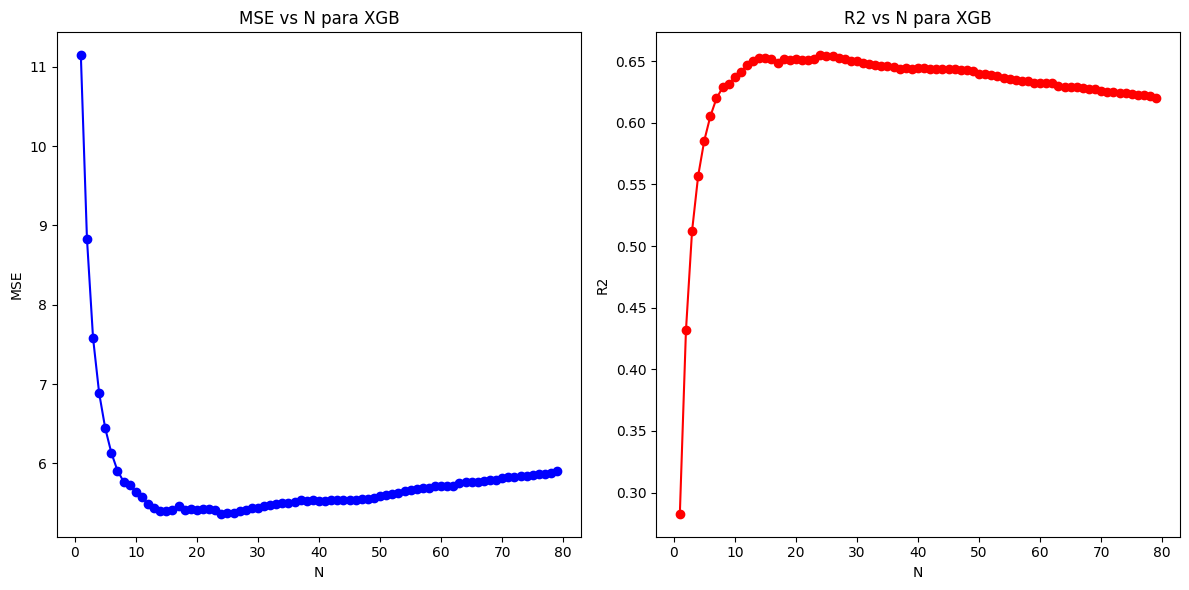

N: 1, MSE: 11.145257853333481, R2: 0.2827707855603566
N: 2, MSE: 8.833945716181288, R2: 0.4315103311383587
N: 3, MSE: 7.579605831219649, R2: 0.5122306897133081
N: 4, MSE: 6.884504922018574, R2: 0.5569624209682701
N: 5, MSE: 6.440243393974899, R2: 0.5855519207319941
N: 6, MSE: 6.131913256764946, R2: 0.6053938467788662
N: 7, MSE: 5.908386417653365, R2: 0.6197784380850444
N: 8, MSE: 5.770605876171861, R2: 0.6286450099340116
N: 9, MSE: 5.729618457900898, R2: 0.6312826675095695
N: 10, MSE: 5.640020548331306, R2: 0.6370485492093646
N: 11, MSE: 5.577045968666876, R2: 0.6411011434962592
N: 12, MSE: 5.486482550963303, R2: 0.6469291584054948
N: 13, MSE: 5.436656188946127, R2: 0.6501356272874396
N: 14, MSE: 5.404074109215975, R2: 0.652232377291539
N: 15, MSE: 5.3978665163727975, R2: 0.6526318536425633
N: 16, MSE: 5.416397431354125, R2: 0.6514393362715156
N: 17, MSE: 5.4574930648433515, R2: 0.6487947147372044
N: 18, MSE: 5.415391769991835, R2: 0.6515040534560221
N: 19, MSE: 5.423470497584704, R2: 

In [656]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def findBestN(X, y, n_values):
    mse_scores = []
    r2_scores = []
    for n in n_values:
        model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=n)
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    best_n = n_values[np.argmin(mse_scores)]
    return best_n, mse_scores, r2_scores

n_values = np.arange(1, 80, 1)
best_n, mse_scores, r2_scores  = findBestN(X, y, n_values)
print(f'Mejor valor de n: {best_n}')

import matplotlib.pyplot as plt

# Crear los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Graficar MSE en el primer subgráfico
ax1.plot(n_values, mse_scores, marker='o', color='b')
ax1.set_xlabel('N')
ax1.set_ylabel('MSE')
ax1.set_title('MSE vs N para XGB')

# Graficar R2 en el segundo subgráfico
ax2.plot(n_values, r2_scores, marker='o', color='r')
ax2.set_xlabel('N')
ax2.set_ylabel('R2')
ax2.set_title('R2 vs N para XGB')

# Mostrar los gráficos
plt.tight_layout()
plt.show()



for i in range(len(mse_scores)):
    print(f'N: {n_values[i]}, MSE: {mse_scores[i]}, R2: {r2_scores[i]}')

## Encontrar la majeor profundidad

Mejor valor de max_depth: 2


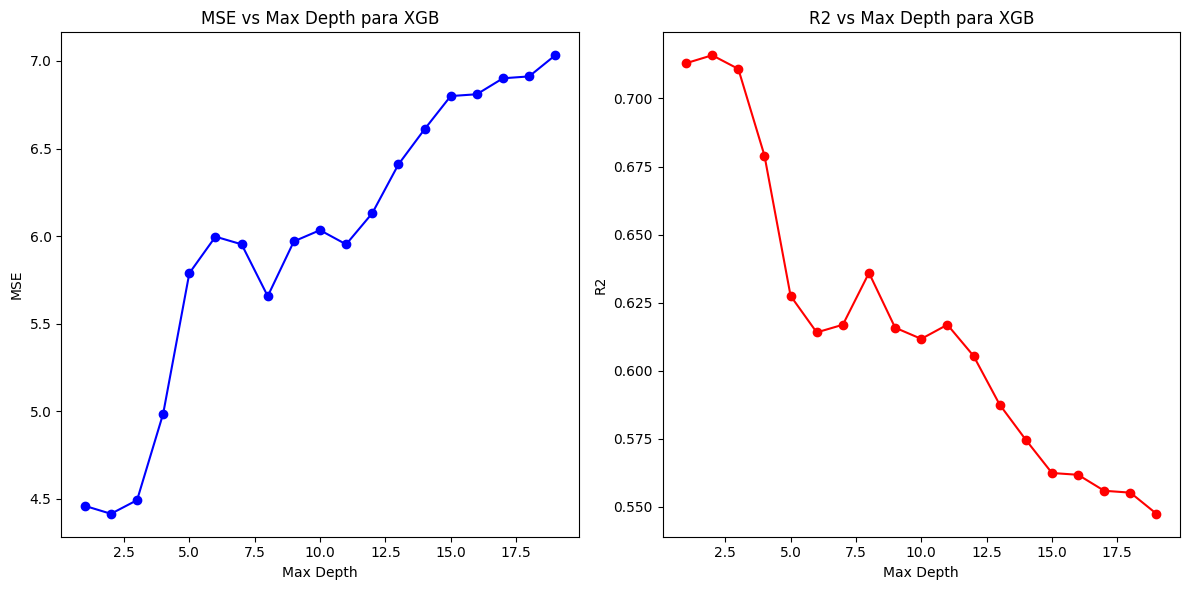

In [657]:
def findBestDeepForXGBTree(X, y, max_depth_values):
    mse_scores = []
    r2_scores = []
    for max_depth in max_depth_values:
        model = xgb.XGBRegressor(objective="reg:squarederror", max_depth=max_depth)
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    best_max_depth = max_depth_values[np.argmin(mse_scores)]
    return best_max_depth, mse_scores, r2_scores

max_depth_values = np.arange(1, 20, 1)
best_max_depth, mse_scores, r2_scores = findBestDeepForXGBTree(X, y, max_depth_values)
print(f'Mejor valor de max_depth: {best_max_depth}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Graficar MSE en el primer subgráfico
ax1.plot(max_depth_values, mse_scores, marker='o', color='b')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('MSE')
ax1.set_title('MSE vs Max Depth para XGB')

# Graficar R2 en el segundo subgráfico
ax2.plot(max_depth_values, r2_scores, marker='o', color='r')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('R2')
ax2.set_title('R2 vs Max Depth para XGB')

# Ajustar el diseño para que no se sobrepongan
plt.tight_layout()
plt.show()

## Arbol XGB con mejores hiperparametros y el promedio CV

In [658]:
XGBMeanCV = xgb.XGBRegressor(objective="reg:squarederror", max_depth=3, n_estimators=24)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

XGBMeanCV.fit(x_train, y_train)
predictions = XGBMeanCV.predict(x_test)

XGBMeanCVMSE = mean_squared_error(y_test, predictions)
XGBMeanCVR2 = r2_score(y_test, predictions)

print('MSE:', XGBMeanCVMSE)
print('R2:', XGBMeanCVR2)

MSE: 4.828005212403288
R2: 0.6893040581589762


## Arbol XGB con mejroes hiperparametros y el mejor CV

In [659]:
XGBModel = xgb.XGBRegressor(objective="reg:squarederror", max_depth=3, n_estimators=24)
x_train = X[:int(0.8*len(X))]
x_test = X[int(0.8*len(X)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]

XGBModel.fit(x_train, y_train)
predictions = XGBModel.predict(x_test)

mse_xgb = mean_squared_error(y_test, predictions)
r2_xgb = r2_score(y_test, predictions)
print('MSE:', mse_xgb)
print('R2:', r2_xgb)

MSE: 3.50091172090375
R2: 0.7611070906150025


# Comparacion entre modelos

## Comparacion entre lso modelos con media de CV

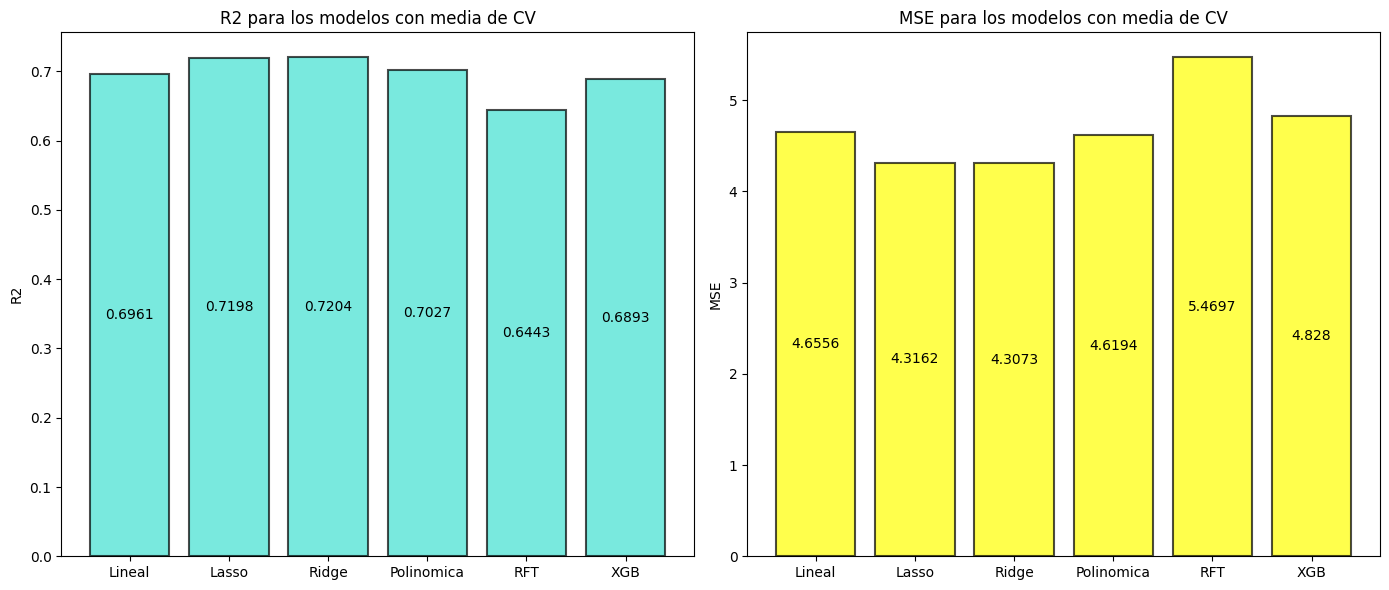

In [660]:
model_names = ['Lineal', 'Lasso', 'Ridge', 'Polinomica', 'RFT', 'XGB']
r2 = [regresionLinealMeanCVR2, lassoMeanCVR2, ridgeMeanCVR2, polimicoMeanCVR2, RFTMeanCVR2, XGBMeanCVR2]
mse = [regresionLinealMeanCVMSE, lassoMeanCVMSE, ridgeMeanCVMSE, polimicoMeanCVMSE, RFTMeanCVMSE, XGBMeanCVMSE]

# Crear figura
plt.figure(figsize=(14, 6))

# Subplot para R2
plt.subplot(1, 2, 1)
bars = plt.bar(model_names, r2, color='turquoise', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5)
plt.ylabel('R2')
plt.title('R2 para los modelos con media de CV')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')

# Subplot para MSE
plt.subplot(1, 2, 2)
bars = plt.bar(model_names, mse, color='yellow', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5)
plt.ylabel('MSE')
plt.title('MSE para los modelos con media de CV')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')

# Ajustar diseño
plt.tight_layout()
plt.show()

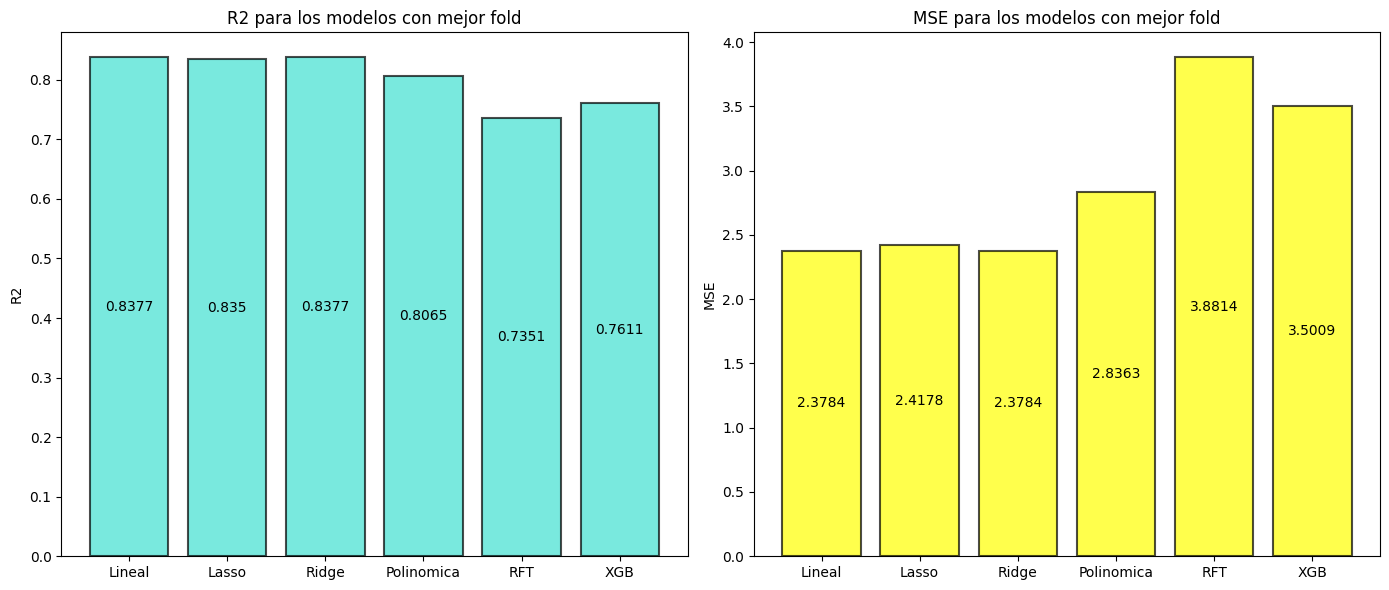

In [661]:
model_names = ['Lineal', 'Lasso', 'Ridge', 'Polinomica', 'RFT', 'XGB']
r2 = [regresionLinealBestCVR2, lassoBestCVR2, ridgeBestCVR2, polimicoBestCVR2, RFTBestCVR2, r2_xgb]
mse = [regresionLinealBestCVMSE, lassoBestCVMSE, ridgeBestCVMSE, polimicoBestCVMSE, RFTBestCVMSE, mse_xgb]

# Crear figura
plt.figure(figsize=(14, 6))

# Subplot para R2
plt.subplot(1, 2, 1)
bars = plt.bar(model_names, r2, color='turquoise', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5)
plt.ylabel('R2')
plt.title('R2 para los modelos con mejor fold')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')

# Subplot para MSE
plt.subplot(1, 2, 2)
bars = plt.bar(model_names, mse, color='yellow', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5)
plt.ylabel('MSE')
plt.title('MSE para los modelos con mejor fold')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')

# Ajustar diseño
plt.tight_layout()
plt.show()

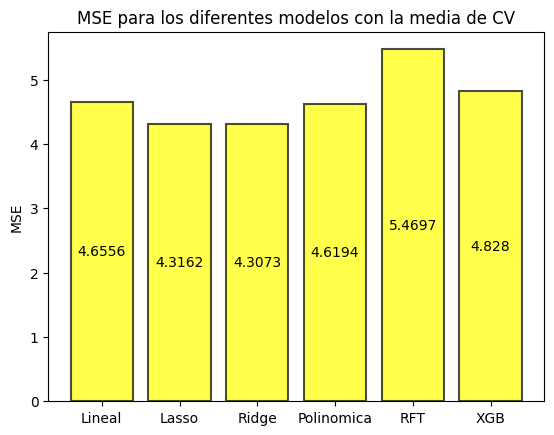

In [662]:
model_names = ['Lineal', 'Lasso', 'Ridge', 'Polinomica', 'RFT', 'XGB']
mse = [regresionLinealMeanCVMSE, lassoMeanCVMSE, ridgeMeanCVMSE, polimicoMeanCVMSE, RFTMeanCVMSE, XGBMeanCVMSE]

bars = plt.bar(model_names, mse, color='yellow', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5, capsize=0.5, ecolor='black')
plt.ylabel('MSE')
plt.title('MSE para los diferentes modelos con la media de CV')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')
plt.show()


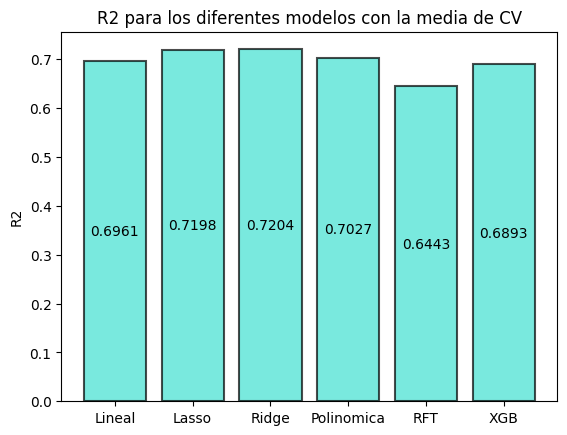

In [663]:
r2 = [regresionLinealMeanCVR2, lassoMeanCVR2, ridgeMeanCVR2, polimicoMeanCVR2, RFTMeanCVR2, XGBMeanCVR2]

bars = plt.bar(model_names, r2, color='turquoise', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5, capsize=0.5, ecolor='black')
plt.ylabel('R2')
plt.title('R2 para los diferentes modelos con la media de CV')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')
plt.show()

## Comparacion entre los modelos con mejor CV

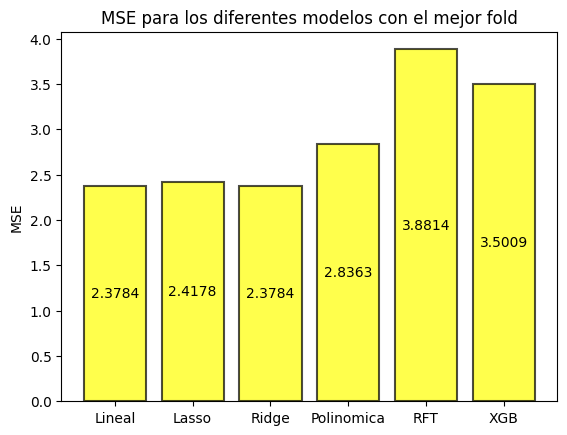

In [664]:
model_names = ['Lineal', 'Lasso', 'Ridge', 'Polinomica', 'RFT', 'XGB']
mse = [regresionLinealBestCVMSE, lassoBestCVMSE, ridgeBestCVMSE, polimicoBestCVMSE, RFTBestCVMSE, mse_xgb]

bars = plt.bar(model_names, mse, color='yellow', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5, capsize=0.5, ecolor='black')
plt.ylabel('MSE')
plt.title('MSE para los diferentes modelos con el mejor fold')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')
plt.show()



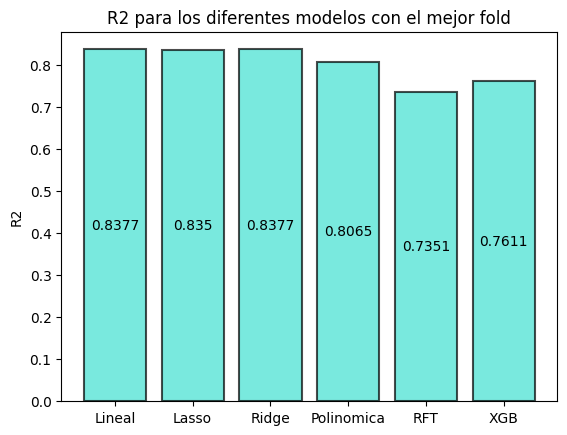

In [665]:
model_names = ['Lineal', 'Lasso', 'Ridge', 'Polinomica', 'RFT', 'XGB']
r2 = [regresionLinealBestCVR2, lassoBestCVR2, ridgeBestCVR2, polimicoBestCVR2, RFTBestCVR2, r2_xgb]

bars = plt.bar(model_names, r2, color='turquoise', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5, capsize=0.5, ecolor='black')
plt.ylabel('R2')
plt.title('R2 para los diferentes modelos con el mejor fold')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')
plt.show()

## Comparacion en los coeficientes de lso diferentes modelos

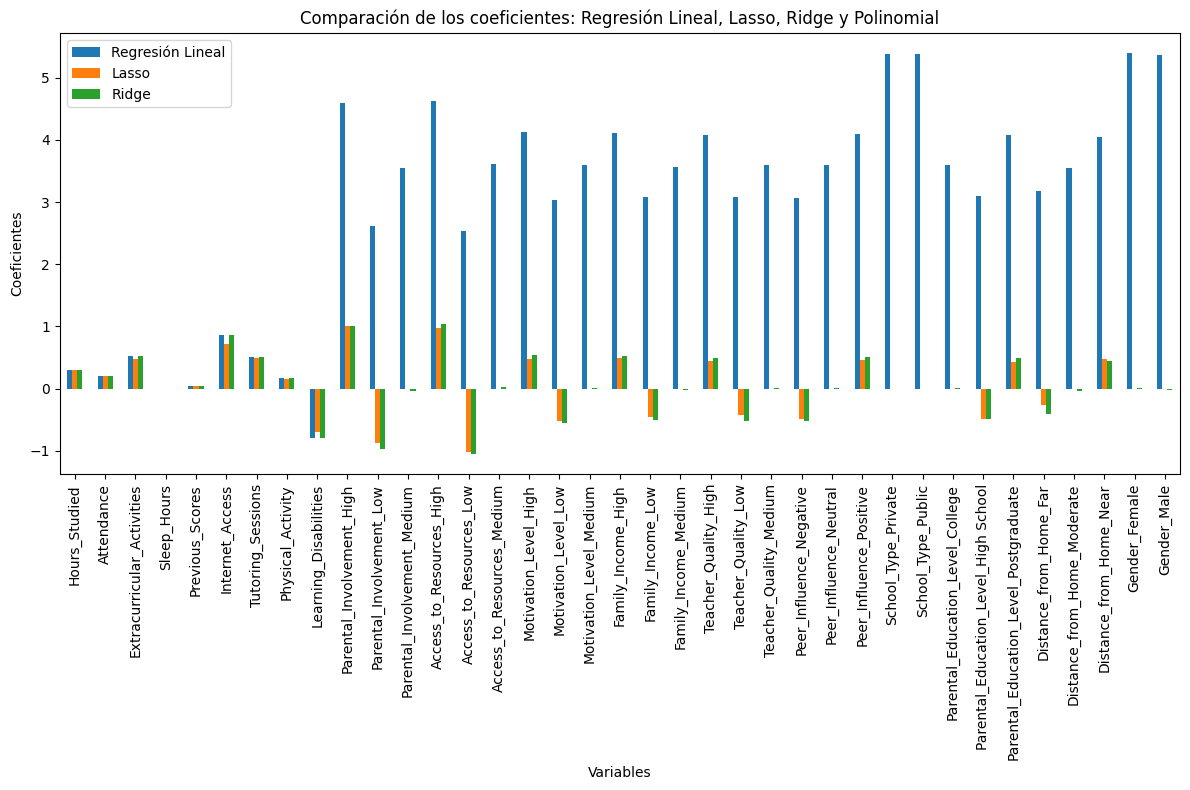

In [666]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

coef_dict = {
    'Variable': x_train.columns, 
    'Regresión Lineal': coeficientes_regresion_lineal,
    'Lasso': coeficientes_lasso,
    'Ridge': coeficientes_ridge,
    
}

coef_df = pd.DataFrame(coef_dict)

fig, ax = plt.subplots(figsize=(12, 8))

coef_df.set_index('Variable').plot(kind='bar', ax=ax)

ax.set_ylabel('Coeficientes')
ax.set_xlabel('Variables')
ax.set_title('Comparación de los coeficientes: Regresión Lineal, Lasso, Ridge y Polinomial')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Funciones utilizadas para clasificacion

In [667]:
def classify(model, X, threshold):
  y_pred_proba = model.predict_proba(X)
  y_pred = []
  for pred in y_pred_proba:
    if pred[1] >= threshold:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred

def cm(prediction, actual):
  tn = 0
  fn = 0
  fp = 0
  tp = 0
  i = 0
  for y_true in actual:
    if(prediction[i] == 1):      
      if(y_true == 1):
        tp+=1
      else:
        fp+=1              
    else:
      if(y_true == 1):           
        fn+=1
      else:
        tn+=1                     
    i+=1
  return tn, fn, fp, tp

def accuracy(tp, tn, fp, fn):
  return (tp + tn) / (tp + tn + fp + fn)

def tpr(tp, tn, fp, fn):
  return tp / (tp + fn)

def precision(tp, tn, fp, fn):
  return tp / (tp + fp)

def fpr(tp, tn, fp, fn):
  return fp / (fp + tn)

threshold = 68
y_boolean = (y >= threshold).astype(int)
print("Positive class: ", sum(y_boolean))
print("Negative class: ", len(y_boolean) - sum(y_boolean))

Positive class:  2918
Negative class:  3460


# Regresion Logisitca

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=0)  

clf = LogisticRegression(random_state=0, max_iter=100).fit(x_train, y_train)

y_pred = classify(clf, x_test, 0.68)
score = sum(y_pred == y_test) / len(y_test)
print('Score con threshold = 70: ', score)

tn, fn, fp, tp = cm(y_pred, y_test)

clfAccuracy = accuracy(tp, tn, fp, fn)
clfRocAuc = roc_auc_score(y_test, y_pred)
clfTpr = tpr(tp, tn, fp, fn)
clfPrecision = precision(tp, tn, fp, fn)
clfFpr = fpr(tp, tn, fp, fn)

print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {clfAccuracy:.4f}")
print(f"TPR/Recall:   {clfTpr:.4f}")
print(f"Precision:   {clfPrecision:.4f}")
print(f"FPR:   {clfFpr:.4f}")
print('ROC AUC Score:', clfRocAuc)

Score con threshold = 70:  0.8981191222570533
trainingError:  0.10188087774294674
testError:  0.07288401253918497
Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     19            483
Predicted 0     663             111
-----------------------------
Accuracy:   0.8981
TPR/Recall:   0.8131
Precision:   0.9622
FPR:   0.0279
ROC AUC Score: 0.8926360377973283


c:\Users\Santiago\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [713]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def find_best_hyperparameters_logistic_regression(X, y):
    # Define the parameter grid
    param_grid = {
        'C': [0.01, 0.1,0.4, 0.7, 1],  # Regularization strength
        'penalty': ['l1', 'l2'],       # Regularization type
        'solver': ['liblinear']        # Solver to use
    }

    # Create a logistic regression model
    model = LogisticRegression()

    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X, y)

    # Get the best parameters
    best_params = grid_search.best_params_

    return best_params

# Example usage
best_params = find_best_hyperparameters_logistic_regression(X, y_boolean)
print("Best hyperparameters for Logistic Regression:", best_params)

x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=41, max_iter=200, C=0.7, penalty='l1', solver='liblinear').fit(x_train, y_train)



y_pred = classify(clf, x_test, 0.68)
score = sum(y_pred == y_test) / len(y_test)
print('Score con threshold = 70: ', score)



tn, fn, fp, tp = cm(y_pred, y_test)
tn2, fn2, fp2, tp2 = cm(clf.predict(x_test), y_test)
trainingError = 1-accuracy(tp, tn, fp, fn)
test_error = 1-accuracy(tp2, tn2, fp2, fn2)

print("trainingError: ", trainingError)
print("testError: ", test_error)

clfAccuracy = accuracy(tp, tn, fp, fn)
clfRocAuc = roc_auc_score(y_test, y_pred)
clfTpr = tpr(tp, tn, fp, fn)
clfPrecision = precision(tp, tn, fp, fn)
clfFpr = fpr(tp, tn, fp, fn)

print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {clfAccuracy:.4f}")
print(f"TPR/Recall:   {clfTpr:.4f}")
print(f"Precision:   {clfPrecision:.4f}")
print(f"FPR:   {clfFpr:.4f}")
print('ROC AUC Score:', clfRocAuc)








c:\Users\Santiago\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best hyperparameters for Logistic Regression: {'C': 0.4, 'penalty': 'l1', 'solver': 'liblinear'}
Score con threshold = 70:  0.9608150470219435
trainingError:  0.039184952978056464
testError:  0.016457680250783646
Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     1            563
Predicted 0     663             49
-----------------------------
Accuracy:   0.9608
TPR/Recall:   0.9199
Precision:   0.9982
FPR:   0.0015
ROC AUC Score: 0.959214308213245


# KNN

## KNN con 3 vecinos

In [670]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=0)    
knn = KNeighborsClassifier(n_neighbors=3)
knn3 = knn.fit(x_train, y_train)
predictions = classify(knn3, x_test, 0.68)
tn, fn, fp, tp = cm(predictions, y_test)
knnModelAccuracy = accuracy(tp, tn, fp, fn)
knnModelRocAuc = roc_auc_score(y_test, predictions)
knnModelTpr = tpr(tp, tn, fp, fn)
knnModelPrecision = precision(tp, tn, fp, fn)
knnModelFpr = fpr(tp, tn, fp, fn)


print('Matriz de Confusion: ')
print(confusion_matrix(y_test, predictions))
print('ROC AUC Score:', roc_auc_score(y_test, predictions))

print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {knnModelAccuracy:.4f}")
print(f"TPR/Recall:   {knnModelTpr:.4f}")
print(f"Precision:   {knnModelPrecision:.4f}")
print(f"FPR:   {knnModelFpr:.4f}")
print("-----------------------------")
print('ROC AUC Score:', knnModelRocAuc)

Matriz de Confusion: 
[[655  27]
 [227 367]]
ROC AUC Score: 0.7891278375149344
Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     27            367
Predicted 0     655             227
-----------------------------
Accuracy:   0.8009
TPR/Recall:   0.6178
Precision:   0.9315
FPR:   0.0396
-----------------------------
ROC AUC Score: 0.7891278375149344


## KNN con Cross Validation

### Encontrar mejor cantidad de vecinos

In [671]:
def findBestNeighnorValue(X, y, neighbor_values):
    accuracy_scores = []
    roc_auc_scores = []
    for neighbor in neighbor_values:
        model = KNeighborsClassifier(n_neighbors=neighbor)
        accuracy_scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=10)))
        roc_auc_scores.append(np.mean(cross_val_score(model, X, y, scoring='roc_auc', cv=10)))
    best_neighbor = neighbor_values[np.argmax(accuracy_scores)]
    return best_neighbor, accuracy_scores, roc_auc_scores

arreglo = np.arange(1, 25, 1)  # Define a valid range for neighbor values
best_neighbor, accur, roc_auc_scores = findBestNeighnorValue(X, y_boolean, arreglo)
print(f'Best neighbor value: {best_neighbor}')

Best neighbor value: 13


### Grafico

para k = 1  ACCURACY:  0.8239295187571049  ROC AUC:  0.8228212782231699
para k = 2  ACCURACY:  0.8228325861330787  ROC AUC:  0.8771928491779271
para k = 3  ACCURACY:  0.8463504475819746  ROC AUC:  0.902297664392133
para k = 4  ACCURACY:  0.8479175996417375  ROC AUC:  0.9152244030607566
para k = 5  ACCURACY:  0.8540324207811892  ROC AUC:  0.9211234493021705
para k = 6  ACCURACY:  0.8537186950980056  ROC AUC:  0.9237344590084622
para k = 7  ACCURACY:  0.8573251871281429  ROC AUC:  0.9260534003856831
para k = 8  ACCURACY:  0.8537201714541617  ROC AUC:  0.9279612185748235
para k = 9  ACCURACY:  0.8582671023557724  ROC AUC:  0.9296226227123032
para k = 10  ACCURACY:  0.8581093783064226  ROC AUC:  0.9308249636942628
para k = 11  ACCURACY:  0.8604599833663873  ROC AUC:  0.9315555919950782
para k = 12  ACCURACY:  0.8604602294257466  ROC AUC:  0.9326142474270341
para k = 13  ACCURACY:  0.8626553249705958  ROC AUC:  0.9330312515050861
para k = 14  ACCURACY:  0.8607734629902117  ROC AUC:  0.93342

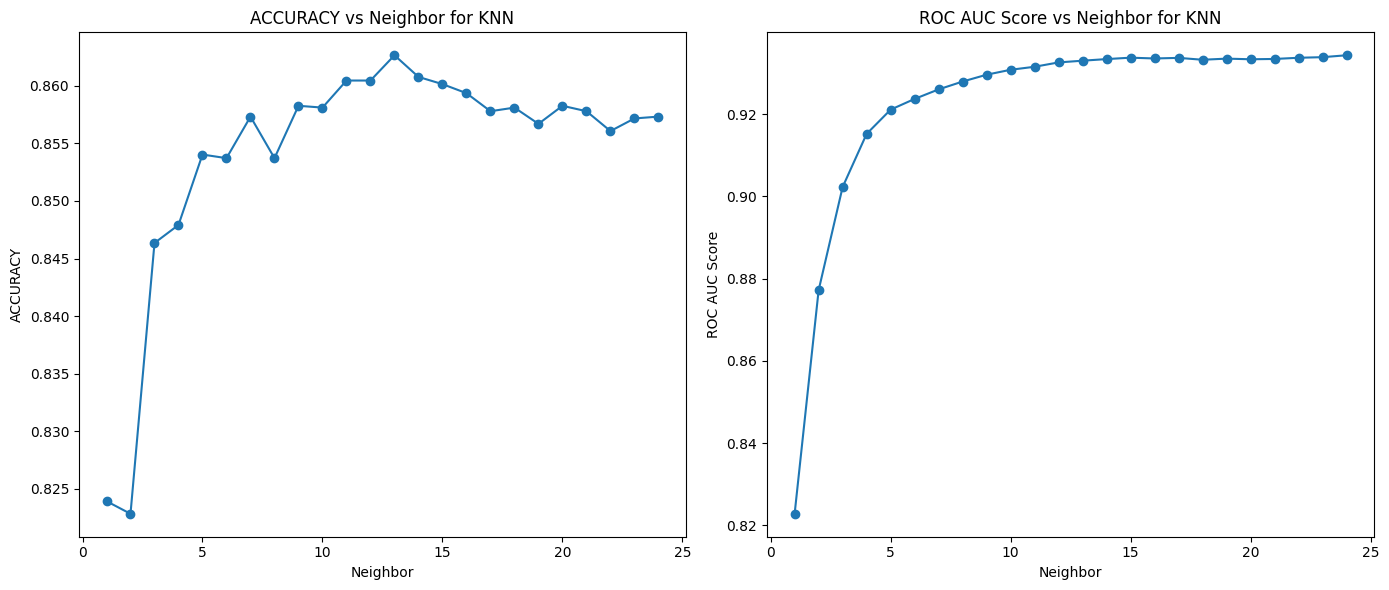

In [672]:
for i in range(len(accur)):
    print("para k =",i+1 ," ACCURACY: ", accur[i], " ROC AUC: ", roc_auc_scores[i])

plt.figure(figsize=(14, 6))

# Primer gráfico: Accuracy vs Neighbor
plt.subplot(1, 2, 1)  # (filas, columnas, índice del gráfico)
plt.plot(arreglo, accur, marker='o')
plt.xlabel('Neighbor')
plt.ylabel('ACCURACY')
plt.title('ACCURACY vs Neighbor for KNN')

# Segundo gráfico: ROC AUC Score vs Neighbor
plt.subplot(1, 2, 2)
plt.plot(arreglo, roc_auc_scores, marker='o')
plt.xlabel('Neighbor')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score vs Neighbor for KNN')

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espacio entre los gráficos para que no se superpongan
plt.show()

### Matriz de confusion para KNN

In [673]:
knnModel = KNeighborsClassifier(n_neighbors=13).fit(x_train, y_train)
y_pred = classify(knnModel, x_test, 0.68)

tn, fn, fp, tp = cm(y_pred, y_test)
knnModelAccuracy = accuracy(tp, tn, fp, fn)
knnModelRocAuc = roc_auc_score(y_test, y_pred)
knnModelTpr = tpr(tp, tn, fp, fn)
knnModelPrecision = precision(tp, tn, fp, fn)
knnModelFpr = fpr(tp, tn, fp, fn)


print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {knnModelAccuracy:.4f}")
print(f"TPR/Recall:   {knnModelTpr:.4f}")
print(f"Precision:   {knnModelPrecision:.4f}")
print(f"FPR:   {knnModelFpr:.4f}")
print("-----------------------------")
print('ROC AUC Score:', knnModelRocAuc)

Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     43            441
Predicted 0     639             153
-----------------------------
Accuracy:   0.8464
TPR/Recall:   0.7424
Precision:   0.9112
FPR:   0.0630
-----------------------------
ROC AUC Score: 0.8396871945259042


# Arboles de decision

## Arbol de decision con parametros por default

In [674]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
clf = tree.DecisionTreeClassifier().fit(x_train, y_train)
y_predicion = classify(clf, x_test, 0.68)
tn, fn, fp, tp = cm(y_predicion, y_test)

clfAccuracy = accuracy(tp, tn, fp, fn)
clfRocAuc = roc_auc_score(y_test, y_predicion)
clfTpr = tpr(tp, tn, fp, fn)
clfPrecision = precision(tp, tn, fp, fn)
clfFpr = fpr(tp, tn, fp, fn)

print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {clfAccuracy:.4f}")
print(f"TPR/Recall:   {clfTpr:.4f}")
print(f"Precision:   {clfPrecision:.4f}")
print(f"FPR:   {clfFpr:.4f}")
print("-----------------------------")
print('ROC AUC Score:', clfRocAuc)



print("Score del arbol: ",clf.score(x_test, y_test))
print("Profundidad del arbol: ", clf.get_depth())
print("cantida de hojas: ",clf.get_n_leaves())
print("ROC AUC Score:", roc_auc_score(y_test, y_predicion))

Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     95            474
Predicted 0     569             138
-----------------------------
Accuracy:   0.8174
TPR/Recall:   0.7745
Precision:   0.8330
FPR:   0.1431
-----------------------------
ROC AUC Score: 0.815718757382471
Score del arbol:  0.817398119122257
Profundidad del arbol:  16
cantida de hojas:  590
ROC AUC Score: 0.815718757382471


## Arbol de decision con cross validation

### Encontar mejor profundidad del arbol para maximizar accuracy

Profundidad: 1 - Accuracy: 0.7549416101140238 - ROC AUC: 0.7538879145228119
Profundidad: 2 - Accuracy: 0.771721628125569 - ROC AUC: 0.8415117567459827
Profundidad: 3 - Accuracy: 0.8203217964301708 - ROC AUC: 0.8812248506070276
Profundidad: 4 - Accuracy: 0.8258084280251768 - ROC AUC: 0.8991820324899953
Profundidad: 5 - Accuracy: 0.8402378409767571 - ROC AUC: 0.9060618149222363
Profundidad: 6 - Accuracy: 0.8418037627397232 - ROC AUC: 0.9091062383963816
Profundidad: 7 - Accuracy: 0.8400779023931733 - ROC AUC: 0.9026237612716489
Profundidad: 8 - Accuracy: 0.8405495981850661 - ROC AUC: 0.8856184808514957
Profundidad: 9 - Accuracy: 0.8353749698577285 - ROC AUC: 0.8674455206461756
Profundidad: 10 - Accuracy: 0.8294144279365956 - ROC AUC: 0.8489678663954315
Profundidad: 11 - Accuracy: 0.8275325659562112 - ROC AUC: 0.8348371592110995
Profundidad: 12 - Accuracy: 0.8262779092828353 - ROC AUC: 0.82768933370503
Profundidad: 13 - Accuracy: 0.8236138245990462 - ROC AUC: 0.8227262962379447
Profundidad

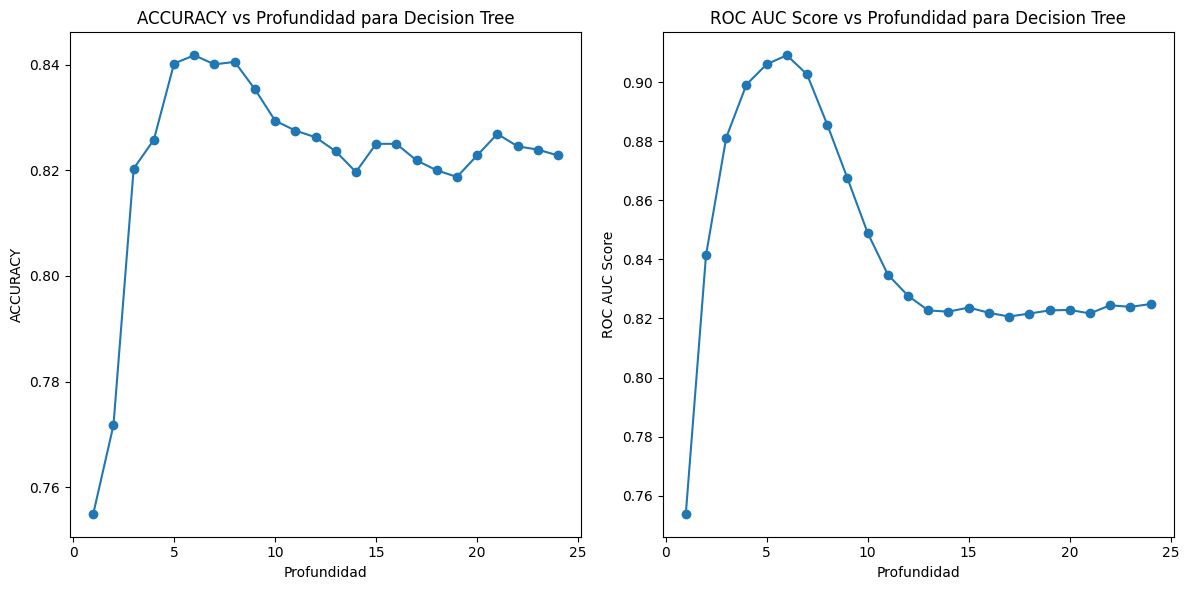

In [675]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
def findBestDeep(X, y, deep_values):
    accuracy_scores = []
    roc_auc_scores = []
    for deep in deep_values:
        model = tree.DecisionTreeClassifier(max_depth=deep)
        accuracy_scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=10)))
        roc_auc_scores.append(np.mean(cross_val_score(model, X, y, scoring='roc_auc', cv=10)))
        print(f"Profundidad: {deep} - Accuracy: {accuracy_scores[-1]} - ROC AUC: {roc_auc_scores[-1]}")
    best_deep = deep_values[np.argmax(accuracy_scores)]
    return best_deep, accuracy_scores, roc_auc_scores

deep_values = np.arange(1, 25, 1)
best_deep, accur, roc_auc_scores = findBestDeep(X, y_boolean, deep_values)
print(f'Mejor profundidad para el arbol: {best_deep}')

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Graficar Accuracy vs Profundidad
ax[0].plot(deep_values, accur, marker='o')
ax[0].set_xlabel('Profundidad')
ax[0].set_ylabel('ACCURACY')
ax[0].set_title('ACCURACY vs Profundidad para Decision Tree')

# Graficar ROC AUC Score vs Profundidad
ax[1].plot(deep_values, roc_auc_scores, marker='o')
ax[1].set_xlabel('Profundidad')
ax[1].set_ylabel('ROC AUC Score')
ax[1].set_title('ROC AUC Score vs Profundidad para Decision Tree')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

### Bias-variance trade-off en arbol de clasifiacion

Profundidad: 1, Train Error: 0.23990591924735394, Test Error: 0.24137931034482762
Profundidad: 2, Train Error: 0.2181497451979616, Test Error: 0.24216300940438873
Profundidad: 3, Train Error: 0.17679341434731477, Test Error: 0.17633228840125392
Profundidad: 4, Train Error: 0.16562132497059978, Test Error: 0.1614420062695925
Profundidad: 5, Train Error: 0.14582516660133282, Test Error: 0.16065830721003138
Profundidad: 6, Train Error: 0.12877303018424147, Test Error: 0.15595611285266453
Profundidad: 7, Train Error: 0.10427283418267341, Test Error: 0.15909090909090906
Profundidad: 8, Train Error: 0.07624460995687965, Test Error: 0.15517241379310343
Profundidad: 9, Train Error: 0.0527244217953744, Test Error: 0.16065830721003138
Profundidad: 10, Train Error: 0.028812230497843982, Test Error: 0.16692789968652033
Profundidad: 11, Train Error: 0.0129361034888279, Test Error: 0.17006269592476486
Profundidad: 12, Train Error: 0.004116032928263458, Test Error: 0.17946708463949845
Profundidad: 13

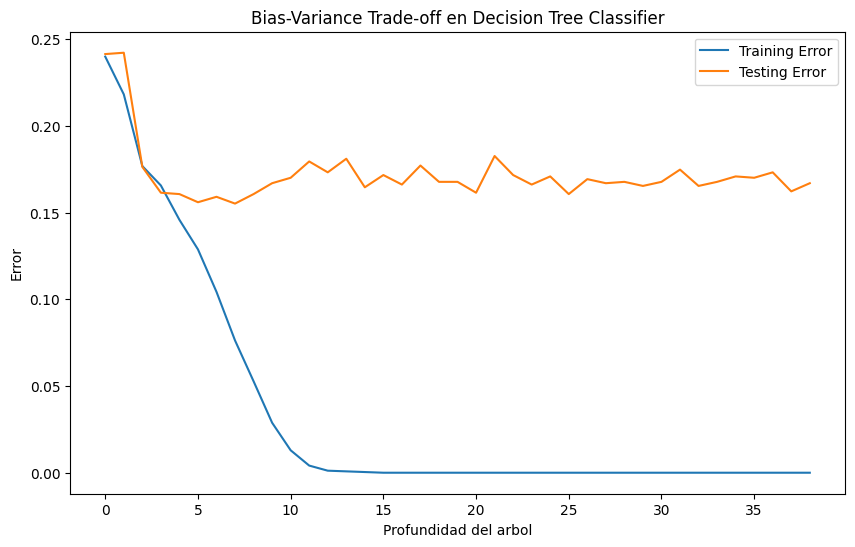

0.0007840062720502194 0.18103448275862066 0.8223136713651202
0.0527244217953744 0.16065830721003138 0.8674455206461756


In [676]:
X_train, X_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)

train_error = []
test_error = []
for i in range(1,40):
  model = tree.DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
  train_error.append(1 - model.score(X_train, y_train))
  test_error.append(1 - model.score(X_test, y_test))
  print(f"Profundidad: {i}, Train Error: {train_error[-1]}, Test Error: {test_error[-1]}")
print(min(test_error), np.argmin(test_error)+1)
print(min(train_error), np.argmin(train_error)+1)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(start=0, stop=len(train_error)), train_error, label='Training Error')
plt.plot(np.arange(start=0, stop=len(test_error)), test_error, label='Testing Error')
plt.xlabel('Profundidad del arbol')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off en Decision Tree Classifier')
plt.legend()

plt.show()

print(train_error[13], test_error[13], roc_auc_scores[13])
print(train_error[8], test_error[8], roc_auc_scores[8])

### Matriz de confusion para arbol de decision con mayor accuracy

In [677]:
TreeModel = tree.DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)
y_pred = classify(TreeModel, x_test, 0.68)

tn, fn, fp, tp = cm(y_pred, y_test)
TreeModelAccuracy = accuracy(tp, tn, fp, fn)
TreeModelRoCAUC = roc_auc_score(y_test, y_pred)
TreeModelTpr = tpr(tp, tn, fp, fn)
TreeModelPrecision = precision(tp, tn, fp, fn)
TreeModelFpr = fpr(tp, tn, fp, fn)

print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {TreeModelAccuracy:.4f}")
print(f"TPR/Recall:   {TreeModelTpr:.4f}")
print(f"Precision:   {TreeModelPrecision:.4f}")
print(f"FPR:   {TreeModelFpr:.4f}")
print("-----------------------------")
print('ROC AUC Score:', TreeModelRoCAUC)

Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     38            443
Predicted 0     626             169
-----------------------------
Accuracy:   0.8378
TPR/Recall:   0.7239
Precision:   0.9210
FPR:   0.0572
-----------------------------
ROC AUC Score: 0.8333136467438381


# Random Forest Tree

## Random Forest Tree estandar

In [692]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
randomForestModel= RandomForestClassifier()
randomForestModel.fit(x_train, y_train)
y_pred = classify(randomForestModel, x_test, 0.68)

tn, fn, fp, tp = cm(y_pred, y_test)
randomForestModelAccuracy = accuracy(tp, tn, fp, fn)
randomForestModelRoCAUC = roc_auc_score(y_test, y_pred)
randomForestModelTpr = tpr(tp, tn, fp, fn)
randomForestModelPrecision = precision(tp, tn, fp, fn)
randomForestModelFpr = fpr(tp, tn, fp, fn)

print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {randomForestModelAccuracy:.4f}")
print(f"TPR/Recall:   {randomForestModelTpr:.4f}")
print(f"Precision:   {randomForestModelPrecision:.4f}")
print(f"FPR:   {randomForestModelFpr:.4f}")
print("-----------------------------")
print('ROC AUC Score:', randomForestModelRoCAUC)

Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     0            387
Predicted 0     664             225
-----------------------------
Accuracy:   0.8237
TPR/Recall:   0.6324
Precision:   1.0000
FPR:   0.0000
-----------------------------
ROC AUC Score: 0.8161764705882353


## Random Forest Tree con cross validation

### Encontrar mejores estimadores para el Random Forest Tree

#### Mejor N

N: 1 - Accuracy: 0.6701017209391594 - ROC AUC: 0.6597317001261757
N: 2 - Accuracy: 0.6785865858279653 - ROC AUC: 0.7434432522348742
N: 3 - Accuracy: 0.7292243716874259 - ROC AUC: 0.7726976781742997
N: 4 - Accuracy: 0.726717026815549 - ROC AUC: 0.8097862148537743
N: 5 - Accuracy: 0.7486657677298072 - ROC AUC: 0.8124215559345084
N: 6 - Accuracy: 0.7547852639970867 - ROC AUC: 0.8310863595597217
N: 7 - Accuracy: 0.7651323061175278 - ROC AUC: 0.8381703132946344
N: 8 - Accuracy: 0.7626252073050103 - ROC AUC: 0.8412866118563641
N: 9 - Accuracy: 0.7721887964252496 - ROC AUC: 0.8486944278006301
N: 10 - Accuracy: 0.7809696707233652 - ROC AUC: 0.8487873774944973
N: 11 - Accuracy: 0.7826896256452908 - ROC AUC: 0.8539292974169798
N: 12 - Accuracy: 0.7834777537733203 - ROC AUC: 0.8585257469376517
N: 13 - Accuracy: 0.790528092597058 - ROC AUC: 0.8591925561878392
N: 14 - Accuracy: 0.7878622854977536 - ROC AUC: 0.8580653351569875
N: 15 - Accuracy: 0.7906902457148762 - ROC AUC: 0.8630359337683219
N: 16 

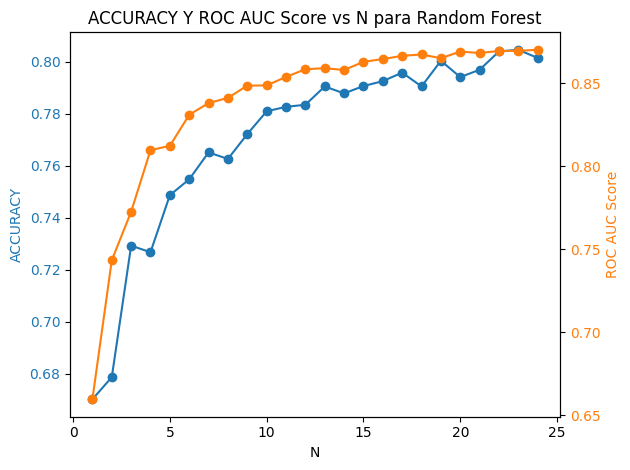

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)

def findBestN(X, y, n_values):
    accuracy_scores = []
    roc_auc_scores = []
    for n in n_values:
        model = RandomForestClassifier(n_estimators=n)
        
        accuracy_scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=10)))
        roc_auc_scores.append(np.mean(cross_val_score(model, X, y, scoring='roc_auc', cv=10)))
        print(f"N: {n} - Accuracy: {accuracy_scores[-1]} - ROC AUC: {roc_auc_scores[-1]}")
    best_n = n_values[np.argmax(accuracy_scores)]
    return best_n, accuracy_scores, roc_auc_scores

n_values = np.arange(1, 25, 1)
best_n, accur, roc_auc_scores = findBestN(X, y_boolean, n_values)
print(f'Best n value: {best_n}')


fig, ax1 = plt.subplots()

# Accuracy plot
ax1.plot(n_values, accur, marker='o', color='tab:blue')
ax1.set_xlabel('N')
ax1.set_ylabel('ACCURACY', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second axis for ROC AUC
ax2 = ax1.twinx()
ax2.plot(n_values, roc_auc_scores, marker='o', color='tab:orange')
ax2.set_ylabel('ROC AUC Score', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Titles and labels
plt.title('ACCURACY Y ROC AUC Score vs N para Random Forest')
fig.tight_layout()
plt.show()

#### Mejor profundidad

Depth: 1 - Accuracy: 0.5196232339089482 - ROC AUC: 0.5
Depth: 2 - Accuracy: 0.5196232339089482 - ROC AUC: 0.5
Depth: 3 - Accuracy: 0.5282574568288854 - ROC AUC: 0.5089869281045751
Depth: 4 - Accuracy: 0.6028257456828885 - ROC AUC: 0.5866013071895425
Depth: 5 - Accuracy: 0.6632653061224489 - ROC AUC: 0.6495098039215687
Depth: 6 - Accuracy: 0.7119309262166404 - ROC AUC: 0.7001633986928104
Depth: 7 - Accuracy: 0.7401883830455259 - ROC AUC: 0.7295751633986928
Depth: 8 - Accuracy: 0.7654901960784314 - ROC AUC: 0.7557829356642255
Depth: 9 - Accuracy: 0.7835294117647059 - ROC AUC: 0.7745737853374282
Depth: 10 - Accuracy: 0.7968627450980392 - ROC AUC: 0.7884626742263171
Depth: 11 - Accuracy: 0.8014128728414442 - ROC AUC: 0.7933006535947713
Depth: 12 - Accuracy: 0.8125490196078431 - ROC AUC: 0.8048025435073627
Depth: 13 - Accuracy: 0.8149019607843138 - ROC AUC: 0.8072535238995197
Depth: 14 - Accuracy: 0.8197492163009404 - ROC AUC: 0.8122194660996929
Depth: 15 - Accuracy: 0.8133333333333334 - RO

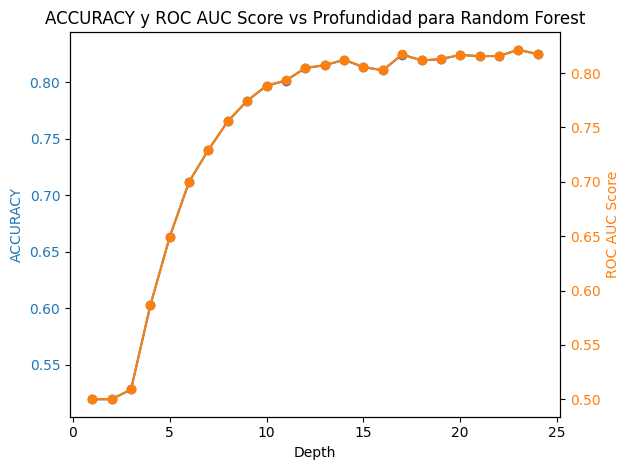

In [731]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)

def findBestDepth(X, y, depth_values):
    accuracy_scores = []
    roc_auc_scores = []
    for depth in depth_values:
        model = RandomForestClassifier(max_depth=depth)
        model = model.fit(x_train, y_train)
        ft, fn, fp, tp = cm(classify(model, x_test, 0.68), y_test)
        accuracy_scores.append(accuracy(tp, tn, fp, fn))
        roc_auc_scores.append(roc_auc_score(y_test, classify(model, x_test, 0.68)))
        # accuracy_scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=10)))
        # roc_auc_scores.append(np.mean(cross_val_score(model, X, y, scoring='roc_auc', cv=10)))
        print(f"Depth: {depth} - Accuracy: {accuracy_scores[-1]} - ROC AUC: {roc_auc_scores[-1]}")
    best_depth = depth_values[np.argmax(accuracy_scores)]
    return best_depth, accuracy_scores, roc_auc_scores

depth_values = np.arange(1, 25, 1)
best_depth, accur, roc_auc_scores = findBestDepth(X, y_boolean, depth_values)
print(f'Best depth value: {best_depth}')



fig, ax1 = plt.subplots()

# Accuracy plot
ax1.plot(depth_values, accur, marker='o', color='tab:blue')
ax1.set_xlabel('Depth')
ax1.set_ylabel('ACCURACY', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second axis for ROC AUC
ax2 = ax1.twinx()
ax2.plot(depth_values, roc_auc_scores, marker='o', color='tab:orange')
ax2.set_ylabel('ROC AUC Score', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Titles and labels
plt.title('ACCURACY y ROC AUC Score vs Profundidad para Random Forest')
fig.tight_layout()
plt.show()

### Bias-variance trade-off en Random Forest Tree

Profundidad: 1, Train Error: 0.2659741277930223, Test Error: 0.30015673981191227
Profundidad: 2, Train Error: 0.1646413171305371, Test Error: 0.18887147335423193
Profundidad: 3, Train Error: 0.14582516660133282, Test Error: 0.1724137931034483
Profundidad: 4, Train Error: 0.13602508820070558, Test Error: 0.15673981191222575
Profundidad: 5, Train Error: 0.1136809094472756, Test Error: 0.14420062695924762
Profundidad: 6, Train Error: 0.09290474323794595, Test Error: 0.12539184952978055
Profundidad: 7, Train Error: 0.06526852214817713, Test Error: 0.11442006269592475
Profundidad: 8, Train Error: 0.0452763622108977, Test Error: 0.11755485893416928
Profundidad: 9, Train Error: 0.029204233633869037, Test Error: 0.11128526645768022
Profundidad: 10, Train Error: 0.01470011760094081, Test Error: 0.10188087774294674
Profundidad: 11, Train Error: 0.004900039200313566, Test Error: 0.09717868338557989
Profundidad: 12, Train Error: 0.001960015680125493, Test Error: 0.09952978056426331
Profundidad: 13

Text(0.5, 1.0, 'Bias-Variance Trade-off en Random Forest Classifier')

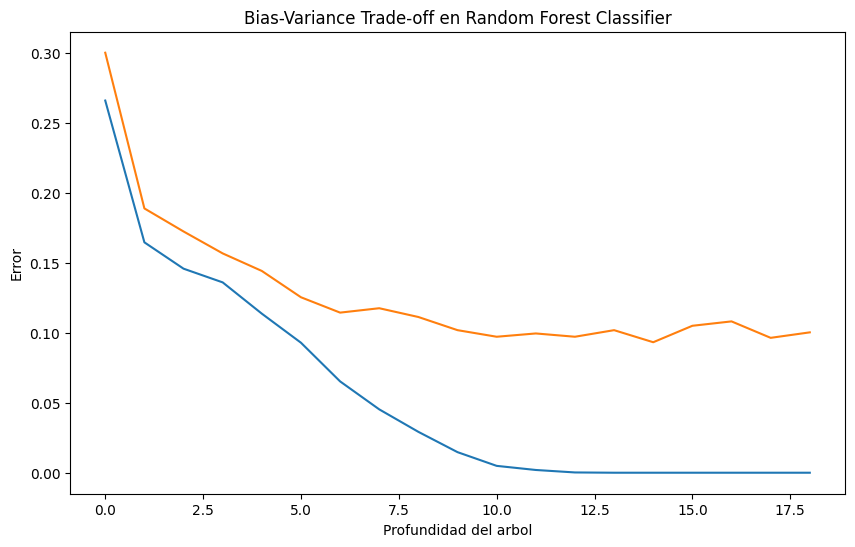

In [695]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
train_error = []
test_error = []
for i in range(1,20):
  model = RandomForestClassifier(max_depth=i).fit(x_train, y_train)
  train_error.append(1 - model.score(x_train, y_train))
  test_error.append(1 - model.score(x_test, y_test))
  print(f"Profundidad: {i}, Train Error: {train_error[-1]}, Test Error: {test_error[-1]}")
print(min(test_error), np.argmin(test_error)+1)
print(min(train_error), np.argmin(train_error)+1)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(start=0, stop=len(train_error)), train_error, label='Training Error')
plt.plot(np.arange(start=0, stop=len(test_error)), test_error, label='Testing Error')
plt.xlabel('Profundidad del arbol')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off en Random Forest Classifier')

### Matriz de confusion para el mejor Random Forest Tree

In [716]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
RandomForestTree = RandomForestClassifier(max_depth=19).fit(x_train, y_train)
y_pred = classify(RandomForestTree, x_test, 0.68)

tn, fn, fp, tp = cm(y_pred, y_test)

RandomForestTreeAccuracy = accuracy(tp, tn, fp, fn)
RandomForestTreeRocAuc = roc_auc_score(y_test, y_pred)
RandomForestTreeTpr = tpr(tp, tn, fp, fn)
RandomForestTreePrecision = precision(tp, tn, fp, fn)
RandomForestTreeFpr = fpr(tp, tn, fp, fn)

print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {RandomForestTreeAccuracy:.4f}")
print(f"TPR/Recall:   {RandomForestTreeTpr:.4f}")
print(f"Precision:   {RandomForestTreePrecision:.4f}")
print(f"FPR:   {RandomForestTreeFpr:.4f}")
print("-----------------------------")
print('ROC AUC Score:', RandomForestTreeRocAuc)

Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     2            382
Predicted 0     662             230
-----------------------------
Accuracy:   0.8182
TPR/Recall:   0.6242
Precision:   0.9948
FPR:   0.0030
-----------------------------
ROC AUC Score: 0.8105854791715883


# Arbol XGB

## Arbol XGB con estimadores por default 

In [683]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
modelXGB= xgb.XGBClassifier(objective='binary:logistic')
modelXGB.fit(x_train, y_train)
predictions = classify(modelXGB, x_test, 0.68)
tn, fn, fp, tp = cm(predictions, y_test)
XGBModelAccuracy = accuracy(tp, tn, fp, fn)
XGBModelRocAuc = roc_auc_score(y_test, predictions)
XGBModelTpr = tpr(tp, tn, fp, fn)
XGBModelPrecision = precision(tp, tn, fp, fn)
XGBModelFpr = fpr(tp, tn, fp, fn)

print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {XGBModelAccuracy:.4f}")
print(f"TPR/Recall:   {XGBModelTpr:.4f}")
print(f"Precision:   {XGBModelPrecision:.4f}")
print(f"FPR:   {XGBModelFpr:.4f}")
print("-----------------------------")
print('ROC AUC Score:', XGBModelRocAuc)



print('Matriz de Confusion: ')
print(confusion_matrix(y_test, predictions))
print('ROC AUC Score:', roc_auc_score(y_test, predictions))

Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     19            552
Predicted 0     645             60
-----------------------------
Accuracy:   0.9381
TPR/Recall:   0.9020
Precision:   0.9667
FPR:   0.0286
-----------------------------
ROC AUC Score: 0.9366731632412
Matriz de Confusion: 
[[645  19]
 [ 60 552]]
ROC AUC Score: 0.9366731632412


## Arbol XGB  con mejor estimador

### Encontrar el mejor estimador para el arbol XGB

In [684]:
# x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)

# def findBestN(X, y, n_values):
#     accuracy_scores = []
#     roc_auc_scores = []
#     for n in n_values:
#         model = xgb.XGBClassifier(n_estimators=n)
#         model.fit(x_train, y_train)
#         tn,fn,fp, tp  = cm( classify(model, x_test, 0.68), y_test)
#         accuracyScore = accuracy(tp, tn, fp, fn)
#         accuracy_scores.append(accuracyScore)
        
#         roc_auc = roc_auc_score(y_test, model.predict(x_test))
#         roc_auc_scores.append(roc_auc)
#         print(f"n: {n} - Accuracy: {accuracyScore} - ROC AUC: {roc_auc}")

    
#     best_n = n_values[np.argmax(accuracy_scores)]
#     return best_n, accuracy_scores, roc_auc_scores

# n_values = np.arange(1, 80, 1)
# best_n, accur, roc_auc_scores = findBestN(X, y_boolean, n_values)
# print(f'Mejor valor de n: {best_n}')

# fig, ax1 = plt.subplots()

# # Accuracy plot
# ax1.plot(n_values, accur, marker='o', color='tab:blue')
# ax1.set_xlabel('N')
# ax1.set_ylabel('ACCURACY', color='tab:blue')
# ax1.tick_params(axis='y', labelcolor='tab:blue')

# # Creating a second axis for ROC AUC
# ax2 = ax1.twinx()
# ax2.plot(n_values, roc_auc_scores, marker='o', color='tab:orange')
# ax2.set_ylabel('ROC AUC Score', color='tab:orange')
# ax2.tick_params(axis='y', labelcolor='tab:orange')

# # Titles and labels
# plt.title('ACCURACY and ROC AUC Score vs N para XGB')
# fig.tight_layout()
# plt.show()

### Bias-variance trade-off del arbol XGB

n: 1, Train Error: 0.13269306154449234, Test Error: 0.1614420062695925
n: 2, Train Error: 0.10838886711093687, Test Error: 0.14341692789968652
n: 3, Train Error: 0.09466875735005875, Test Error: 0.1410658307210031
n: 4, Train Error: 0.09172873382987068, Test Error: 0.13949843260188088
n: 5, Train Error: 0.08094864758918074, Test Error: 0.13322884012539182
n: 6, Train Error: 0.07546060368482943, Test Error: 0.1308777429467085
n: 7, Train Error: 0.06860054880439048, Test Error: 0.12539184952978055
n: 8, Train Error: 0.06389651117208939, Test Error: 0.12539184952978055
n: 9, Train Error: 0.06056448451587615, Test Error: 0.12147335423197492
n: 10, Train Error: 0.052332418659349234, Test Error: 0.11912225705329149
n: 11, Train Error: 0.04762838102704825, Test Error: 0.10971786833855801
n: 12, Train Error: 0.03920031360250886, Test Error: 0.10501567398119127
n: 13, Train Error: 0.03547628381027046, Test Error: 0.10109717868338552
n: 14, Train Error: 0.02763622108976871, Test Error: 0.1042319

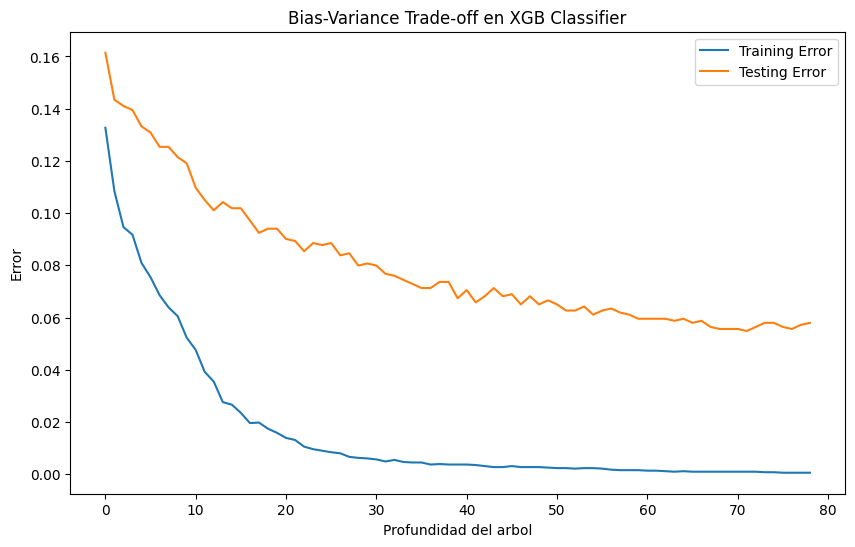

In [702]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
x_train_error = []
x_test_error = []

for i in range(1,80):
  model = xgb.XGBClassifier(n_estimators=i).fit(x_train, y_train)
  x_train_error.append(1 - model.score(x_train, y_train))
  x_test_error.append(1 - model.score(x_test, y_test))
  print(f"n: {i}, Train Error: {x_train_error[-1]}, Test Error: {x_test_error[-1]}")

print(min(x_test_error), np.argmin(x_test_error)+1)
print(min(x_train_error), np.argmin(x_train_error)+1)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(start=0, stop=len(x_train_error)), x_train_error, label='Training Error')
plt.plot(np.arange(start=0, stop=len(x_test_error)), x_test_error, label='Testing Error')
plt.xlabel('Profundidad del arbol')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off en XGB Classifier')
plt.legend()


### Matriz de Confusion para el Arbol XGB con mejor cantidad de estimadores

In [686]:
ArbolXGB = xgb.XGBClassifier(n_estimators=69).fit(x_train, y_train)
y_pred = classify(ArbolXGB, x_test, 0.68)

tn, fn, fp, tp = cm(y_pred, y_test)

ArbolXgbAccuracy = accuracy(tp, tn, fp, fn)
ArbolXGBRocAuc = roc_auc_score(y_test, y_pred)
ArbolXGBTpr = tpr(tp, tn, fp, fn)
ArbolXGBPrecision = precision(tp, tn, fp, fn)
ArbolXGBFpr = fpr(tp, tn, fp, fn)

print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {ArbolXgbAccuracy:.4f}")
print(f"TPR/Recall:   {ArbolXGBTpr:.4f}")
print(f"Precision:   {ArbolXGBPrecision:.4f}")
print(f"FPR:   {ArbolXGBFpr:.4f}")
print("-----------------------------")
print('ROC AUC Score:', ArbolXGBRocAuc)

Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     18            533
Predicted 0     646             79
-----------------------------
Accuracy:   0.9240
TPR/Recall:   0.8709
Precision:   0.9673
FPR:   0.0271
-----------------------------
ROC AUC Score: 0.9219032994723995


# Comparacion de los diferentes modelos de clasificacion

## Accuracy y Roc-Auc score

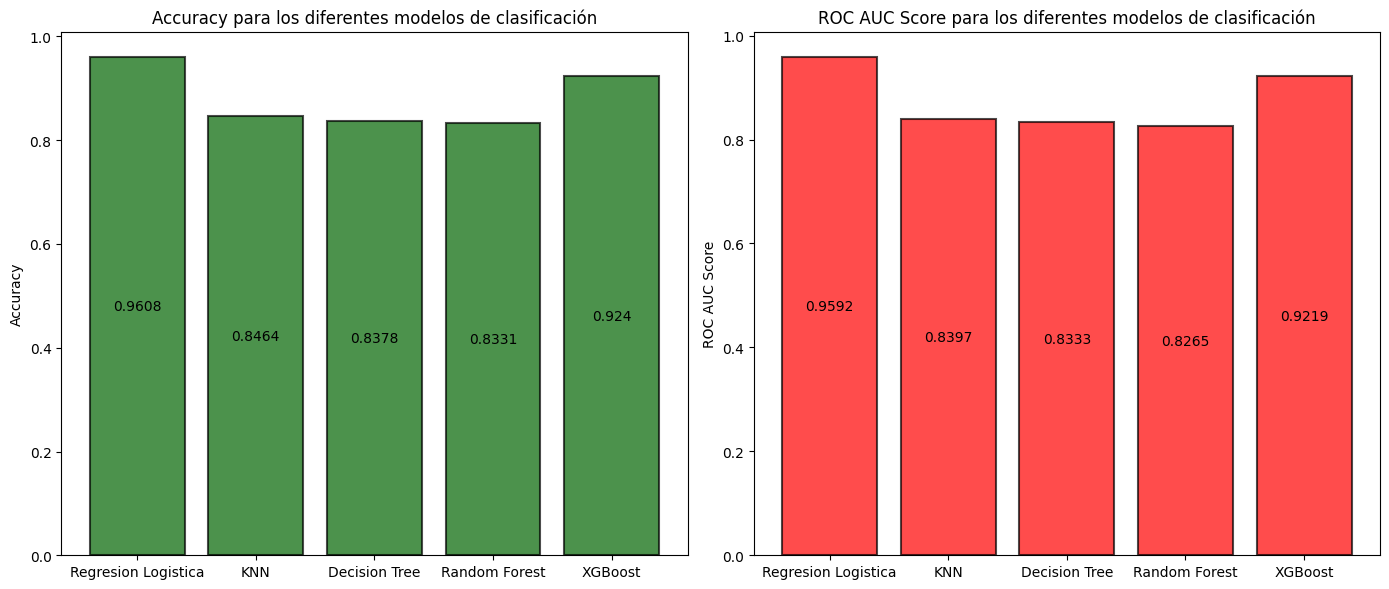

In [699]:
model_names = ['Regresion Logistica', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracy_scores = [clfAccuracy, knnModelAccuracy, TreeModelAccuracy, RandomForestTreeAccuracy, ArbolXgbAccuracy]
roc_auc_scores = [clfRocAuc, knnModelRocAuc, TreeModelRoCAUC, RandomForestTreeRocAuc, ArbolXGBRocAuc]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Accuracy)
bars = ax1.bar(model_names, accuracy_scores, color='darkgreen', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5, capsize=0.5, ecolor='black')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy para los diferentes modelos de clasificación')

# Añadir valores en las barras del primer gráfico
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')

# Segundo gráfico (ROC AUC Score)
bars = ax2.bar(model_names, roc_auc_scores, color='red', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5, capsize=0.5, ecolor='black')
ax2.set_ylabel('ROC AUC Score')
ax2.set_title('ROC AUC Score para los diferentes modelos de clasificación')

# Añadir valores en las barras del segundo gráfico
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## Tpr, fpr y precision

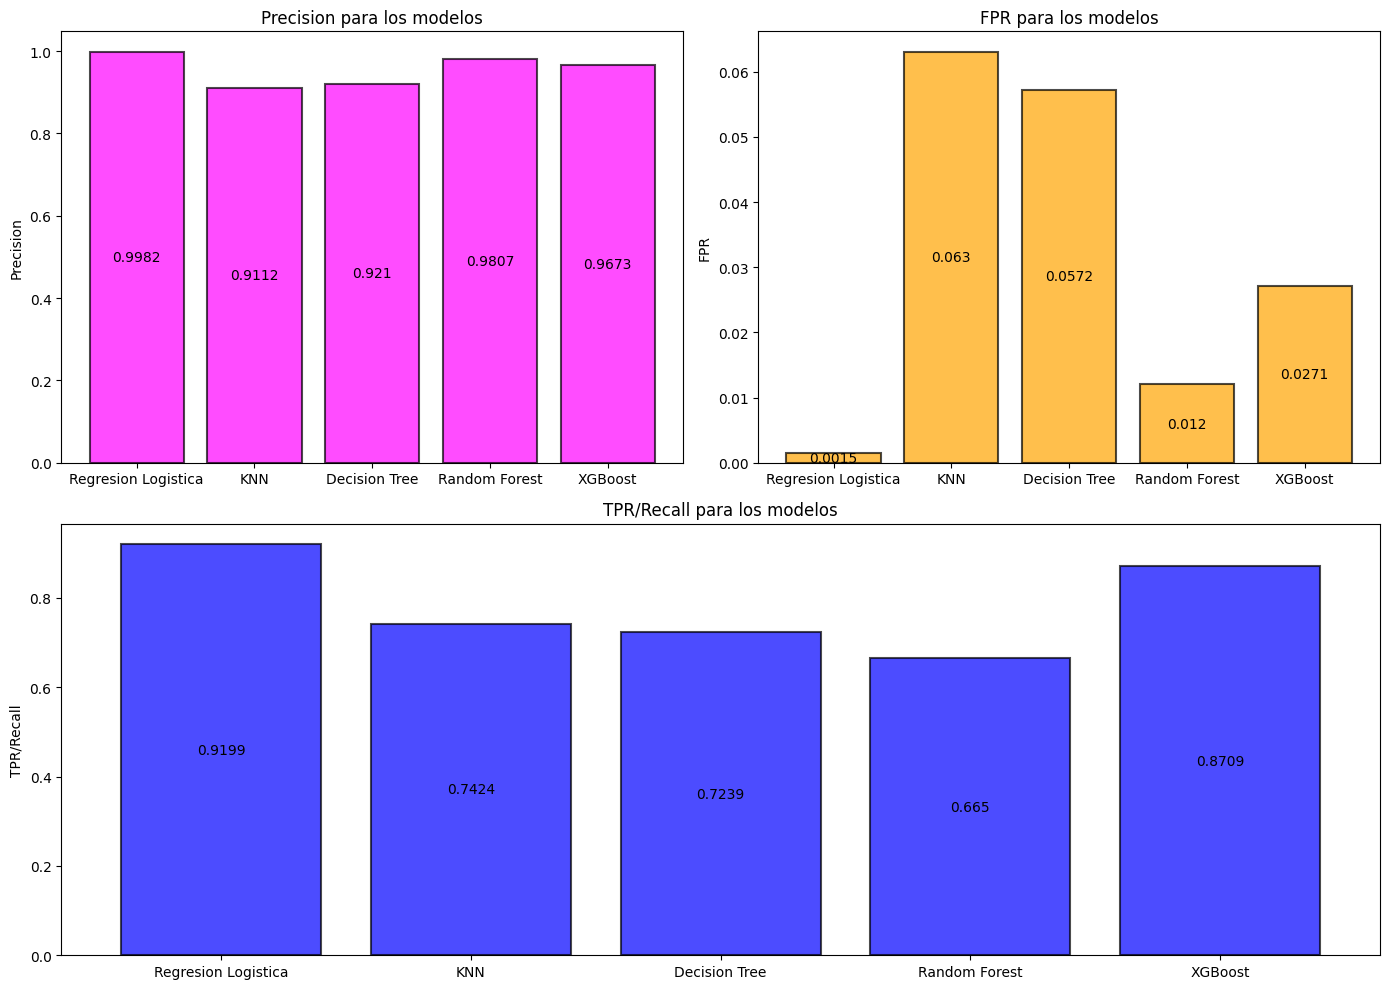

In [698]:
tprScores = [clfTpr, knnModelTpr, TreeModelTpr, RandomForestTreeTpr, ArbolXGBTpr]
precisionScores = [clfPrecision, knnModelPrecision, TreeModelPrecision, RandomForestTreePrecision, ArbolXGBPrecision]
fprScores = [clfFpr, knnModelFpr, TreeModelFpr, RandomForestTreeFpr, ArbolXGBFpr]

plt.figure(figsize=(14, 10))

# Subplot para Precision
plt.subplot(2, 2, 1)
bars = plt.bar(model_names, precisionScores, color='magenta', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5)
plt.ylabel('Precision')
plt.title('Precision para los modelos')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')

# Subplot para FPR
plt.subplot(2, 2, 2)
bars = plt.bar(model_names, fprScores, color='orange', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5)
plt.ylabel('FPR')
plt.title('FPR para los modelos')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')

# Subplot para TPR/Recall
plt.subplot(2, 1, 2)
bars = plt.bar(model_names, tprScores, color='blue', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5)
plt.ylabel('TPR/Recall')
plt.title('TPR/Recall para los modelos')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')

# Ajustar el diseño
plt.tight_layout()
plt.show()